# Solar Power Prediction
<br>

**Problem Statement**

File1:  power_actual
1. This file contains the solar generation of a certain plant from October 1st, 2017 to September 30th, 2019.
2. You'll find the following columns: 'power', 'gti' and 'ghi'. Power is the actual power generated while GHI (Global Horizontal Irradiance) and GTI (Global Tilt Irradiance) are the parameters relevant to the that define the radiation received from the sun.

File2: weather_actuals
1. This file contains the weather data of the same plant from October 1st, 2017 to September 30th, 2019.
2. The columns' names are self-explanatory.

File3: weather_forecast
1. This file contains the weather data from October 1st, 2019 to October 27th, 2019. 

**You need to predict the generation of power of the given plan in this duration: October 1st, 2019 to October 27th, 2019.** 


## Imports

In [1]:
# importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('whitegrid')
sns.set_context(font_scale=1.1)
sns.set_palette(palette='viridis')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [5]:
# importing dataset

df = pd.read_excel('power_actual_Working.xlsx',sheet_name='weather_actuals')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13619 entries, 0 to 13618
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            13619 non-null  int64         
 1   plant_id              13619 non-null  int64         
 2   datetime_utc          13619 non-null  datetime64[ns]
 3   datetime_local        13619 non-null  datetime64[ns]
 4   cloud_cover           13619 non-null  float64       
 5   apparent_temperature  13619 non-null  float64       
 6   temperature           13619 non-null  int64         
 7   humidity              13619 non-null  int64         
 8   dew_point             13619 non-null  float64       
 9   wind_bearing          13619 non-null  int64         
 10  wind_speed            13619 non-null  float64       
 11  wind_chill            3744 non-null   float64       
 12  wind_gust             13619 non-null  float64       
 13  heat_index      

In [7]:
df.head(5)

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at,ghi,gti,Cum Power
0,0,1,2017-09-30 18:30:00,2017-10-01 00:00:00,0.0,26.52,26,1,19.46,308,0.83,-9999.0,-9999.0,-9999.0,1007.90,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.57,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,NaN,NaN,NaN
1,1,1,2017-09-30 19:30:00,2017-10-01 01:00:00,0.0,28.78,27,1,19.46,-9999,0.83,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0,0.0,0.0
2,2,1,2017-09-30 20:30:00,2017-10-01 02:00:00,0.0,26.58,26,1,19.46,-9999,0.83,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0,0.0,0.0
3,3,1,2017-09-30 21:30:00,2017-10-01 03:00:00,0.0,23.84,23,1,19.46,270,0.83,-9999.0,-9999.0,-9999.0,1008.12,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,2019-07-16 16:37:16,0.0,0.0,0.0
4,4,1,2017-09-30 22:30:00,2017-10-01 04:00:00,0.0,24.13,24,1,19.46,-9999,0.83,-9999.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,2019-07-16 16:37:16,0.0,0.0,0.0


## Data Cleaning

In [8]:
# dropping unnecessary columns

df.drop(['Unnamed: 0','plant_id','datetime_utc','updated_at','ghi','gti'],axis=1,inplace=True)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5]),
 <a list of 28 Text major ticklabel objects>)

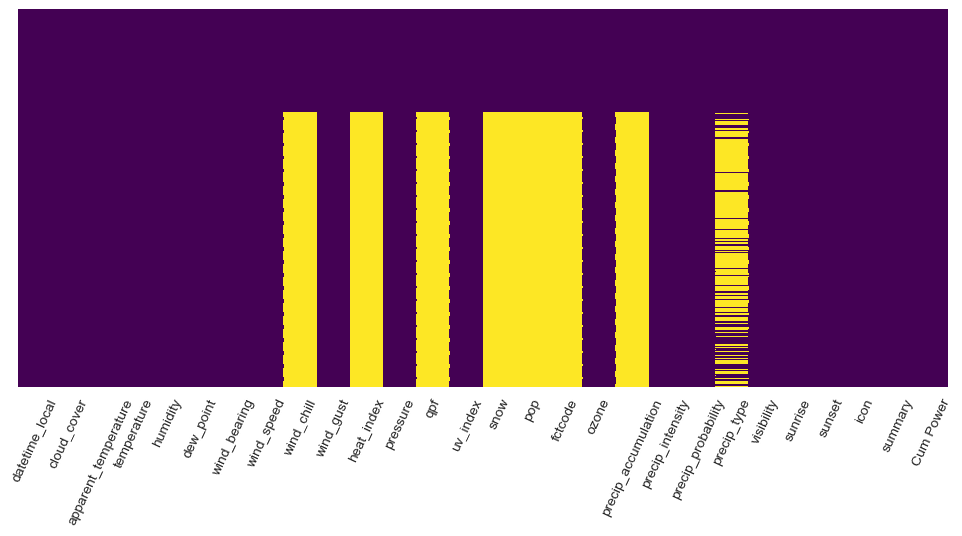

In [9]:
# checking for null values

plt.figure(figsize=(12,5),dpi=100)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')
plt.xticks(rotation=65)

In [10]:
# getting number of null values per column

df.isnull().sum()

datetime_local             0
cloud_cover                0
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
wind_chill              9875
wind_gust                  0
heat_index              9875
pressure                   0
qpf                     9875
uv_index                   0
snow                    9875
pop                     9875
fctcode                 9875
ozone                      0
precip_accumulation     9875
precip_intensity           0
precip_probability         0
precip_type             7129
visibility                 0
sunrise                    0
sunset                     0
icon                       0
summary                    0
Cum Power                  1
dtype: int64

In [11]:
# dropping columns with more than 70% missing data

df.drop(['wind_chill','heat_index','qpf','snow','pop','fctcode','precip_accumulation'],axis=1,inplace=True)

In [12]:
# getting number of null values per column

df.isnull().sum()

datetime_local             0
cloud_cover                0
apparent_temperature       0
temperature                0
humidity                   0
dew_point                  0
wind_bearing               0
wind_speed                 0
wind_gust                  0
pressure                   0
uv_index                   0
ozone                      0
precip_intensity           0
precip_probability         0
precip_type             7129
visibility                 0
sunrise                    0
sunset                     0
icon                       0
summary                    0
Cum Power                  1
dtype: int64

In [13]:
## checking precipitation_type column

df['precip_type']

0        rain
1        rain
2        rain
3        rain
4        rain
         ... 
13614     NaN
13615     NaN
13616     NaN
13617     NaN
13618     NaN
Name: precip_type, Length: 13619, dtype: object

In [14]:
df['precip_type'].unique()

array(['rain', -9999, nan], dtype=object)

In [15]:
df['precip_type'].value_counts()

rain     6147
-9999     343
Name: precip_type, dtype: int64

In [16]:
df[df['precip_type']==-9999][['precip_probability','precip_type']].sample(10)

,precip_probability,precip_type
3362,0.0,-9999
3291,0.0,-9999
3568,0.0,-9999
3639,0.0,-9999
3723,0.0,-9999
3589,0.0,-9999
3347,0.0,-9999
3413,0.0,-9999
3734,0.0,-9999
3298,0.0,-9999


In [17]:
# replacing by none if precip_type is NaN or -9999

df['precip_type'] = np.where(df['precip_type']=='rain','rain','none')

In [18]:
# removing any remaining null values

df.dropna(inplace=True)

In [19]:
df.isnull().sum()

datetime_local          0
cloud_cover             0
apparent_temperature    0
temperature             0
humidity                0
dew_point               0
wind_bearing            0
wind_speed              0
wind_gust               0
pressure                0
uv_index                0
ozone                   0
precip_intensity        0
precip_probability      0
precip_type             0
visibility              0
sunrise                 0
sunset                  0
icon                    0
summary                 0
Cum Power               0
dtype: int64

In [20]:
# checking the head of data again

df.head(10)

,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,Cum Power
1,2017-10-01 01:00:00,0.0,28.78,27,1,19.46,-9999,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,0.00
2,2017-10-01 02:00:00,0.0,26.58,26,1,19.46,-9999,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,0.00
3,2017-10-01 03:00:00,0.0,23.84,23,1,19.46,270,0.83,-9999.0,1008.12,-9999,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,0.00
4,2017-10-01 04:00:00,0.0,24.13,24,1,19.46,-9999,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,0.00
5,2017-10-01 05:00:00,0.0,24.13,24,1,19.46,-9999,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,0.00
6,2017-10-01 06:00:00,0.0,21.87,22,1,19.46,-9999,0.83,-9999.0,1008.65,-9999,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,0.00
7,2017-10-01 07:00:00,0.0,25.23,25,1,19.46,-9999,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,0.42
8,2017-10-01 08:00:00,0.0,24.29,24,1,19.46,-9999,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.30,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,7.56
9,2017-10-01 09:00:00,0.0,26.56,26,1,19.46,237,0.83,-9999.0,1009.95,-9999,-9999.0,-9999.0,-9999.0,rain,3.85,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,24.46
10,2017-10-01 10:00:00,0.0,32.03,31,0,19.46,281,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.54,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-day,Clear,35.94


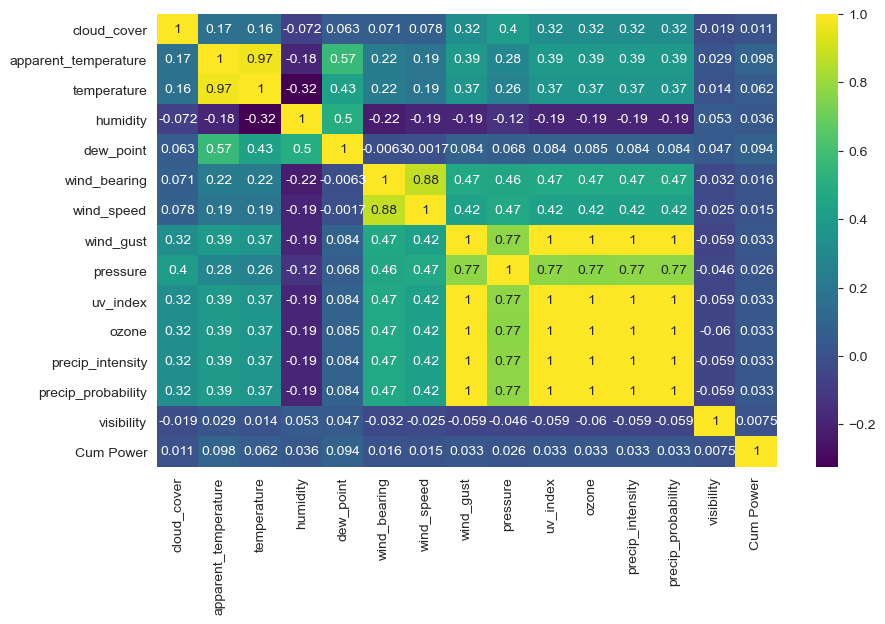

In [21]:
# ploting correlation matrix

plt.figure(figsize=(10,6),dpi=100)
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cloud_cover,13618.0,-314.028368,1744.672011,-9999.00,0.00,0.00,0.4100,1.00
apparent_temperature,13618.0,25.944597,10.470191,3.14,17.31,25.53,34.5800,49.75
temperature,13618.0,24.497944,8.840331,5.00,17.00,25.00,31.0000,47.00
humidity,13618.0,0.537377,0.498619,0.00,0.00,1.00,1.0000,1.00
dew_point,13618.0,11.928656,9.132584,-20.56,5.92,10.71,19.6675,28.35
wind_bearing,13618.0,-498.736599,2558.028453,-9999.00,79.00,149.00,293.0000,359.00
wind_speed,13618.0,-528.367083,2242.608653,-9999.00,1.61,2.41,3.3300,9.73
wind_gust,13618.0,-2392.625739,4269.993017,-9999.00,1.19,3.07,4.7100,15.15
pressure,13618.0,-733.721947,4018.548943,-9999.00,998.75,1006.90,1014.7400,1025.69
uv_index,13618.0,-2394.430900,4268.979994,-9999.00,0.00,0.00,2.0000,12.00


In [23]:
df.shape

(13618, 21)

## Feature extraction

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13618 entries, 1 to 13618
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   datetime_local        13618 non-null  datetime64[ns]
 1   cloud_cover           13618 non-null  float64       
 2   apparent_temperature  13618 non-null  float64       
 3   temperature           13618 non-null  int64         
 4   humidity              13618 non-null  int64         
 5   dew_point             13618 non-null  float64       
 6   wind_bearing          13618 non-null  int64         
 7   wind_speed            13618 non-null  float64       
 8   wind_gust             13618 non-null  float64       
 9   pressure              13618 non-null  float64       
 10  uv_index              13618 non-null  int64         
 11  ozone                 13618 non-null  float64       
 12  precip_intensity      13618 non-null  float64       
 13  precip_probabili

In [25]:
# extracting year from datetime_local column

df['year'] = df['datetime_local'].apply(lambda dt : dt.year)

In [26]:
# extracting month from datetime_local column

df['month'] = df['datetime_local'].apply(lambda dt : dt.month)

In [27]:
# extracting day from datetime_local column

df['day'] = df['datetime_local'].apply(lambda dt : dt.day)

In [28]:
# extracting hour from datetime_local column

df['hour'] = df['datetime_local'].apply(lambda dt : dt.hour)

In [29]:
df.head()

,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,Cum Power,year,month,day,hour
1,2017-10-01 01:00:00,0.0,28.78,27,1,19.46,-9999,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,0.0,2017,10,1,1
2,2017-10-01 02:00:00,0.0,26.58,26,1,19.46,-9999,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,0.0,2017,10,1,2
3,2017-10-01 03:00:00,0.0,23.84,23,1,19.46,270,0.83,-9999.0,1008.12,-9999,-9999.0,-9999.0,-9999.0,rain,3.56,2017-10-01 00:52:02,2017-10-01 12:45:07,clear-night,Clear,0.0,2017,10,1,3
4,2017-10-01 04:00:00,0.0,24.13,24,1,19.46,-9999,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,0.0,2017,10,1,4
5,2017-10-01 05:00:00,0.0,24.13,24,1,19.46,-9999,0.83,-9999.0,-9999.00,-9999,-9999.0,-9999.0,-9999.0,rain,3.06,2017-10-01 00:52:02,2017-10-01 12:45:07,fog,Foggy,0.0,2017,10,1,5


## Impute Cloud Cover

In [30]:
# checking for number of data errors

df[df['cloud_cover']==-9999].shape[0]

428

In [31]:
# function for replacing data errors for cloud_cover

def impute_cloud(data):
    month = data[0]
    cloud = data[1]
    if cloud == -9999:
        return df[df['cloud_cover']!=-9999][df['month']==month]['cloud_cover'].mean()
    else:
        return cloud

In [32]:
df['cloud_cover_impute'] = df[['month','cloud_cover']].apply(impute_cloud,axis=1)

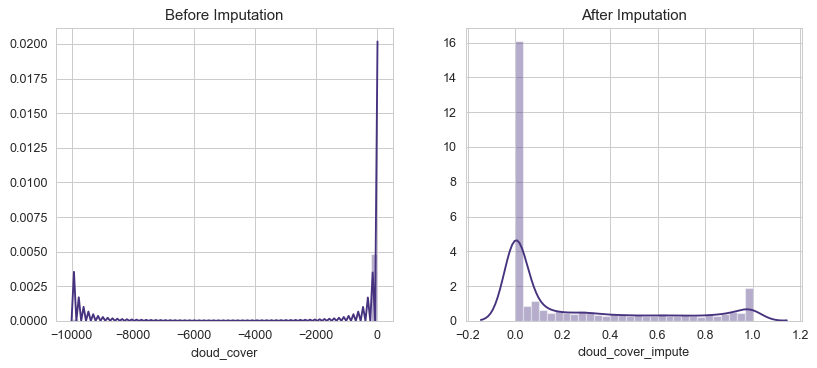

In [33]:
fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(10,5))

sns.distplot(df['cloud_cover'],ax = axes[0])
axes[0].set_title('Before Imputation')

sns.distplot(df['cloud_cover_impute'],ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout(pad=4.0)

## Impute Wind Bearing

In [34]:
# checking for number of data errors

df[df['wind_bearing']==-9999].shape[0]

919

In [35]:
# function for replacing data errors for wind_bearing

def impute_windBearing(data):
    month = data[0]
    wind_bearing = data[1]
    if wind_bearing == -9999:
        return df[df['wind_bearing']!=-9999][df['month']==month]['wind_bearing'].median()
    else:
        return wind_bearing

In [36]:
df['wind_bearing_impute'] = df[['month','wind_bearing']].apply(impute_windBearing,axis=1)

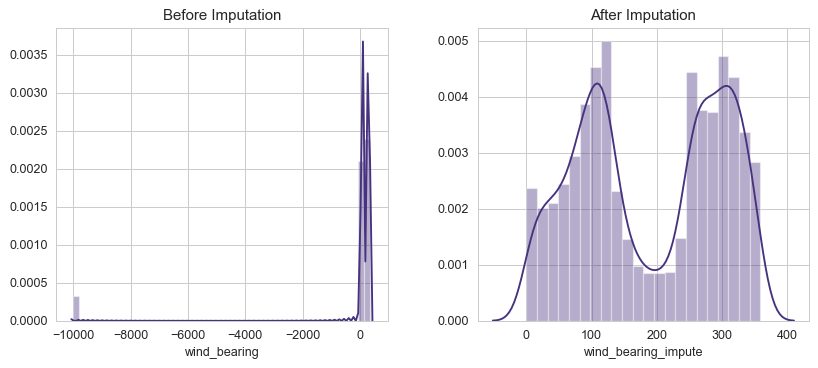

In [37]:
fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(10,5))

sns.distplot(df['wind_bearing'],ax = axes[0])
axes[0].set_title('Before Imputation')

sns.distplot(df['wind_bearing_impute'],ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout(pad=4.0)

## Impute Wind Speed

In [38]:
# checking for number of data errors

df[df['wind_speed']==-9999].shape[0]

723

In [39]:
# function for replacing data errors for wind_speed

def impute_windSpeed(data):
    month = data[0]
    wind_speed = data[1]
    if wind_speed == -9999:
        return df[df['wind_speed']!=-9999][df['month']==month]['wind_speed'].mean()
    else:
        return wind_speed

In [40]:
df['wind_speed_impute'] = df[['month','wind_speed']].apply(impute_windSpeed,axis=1)

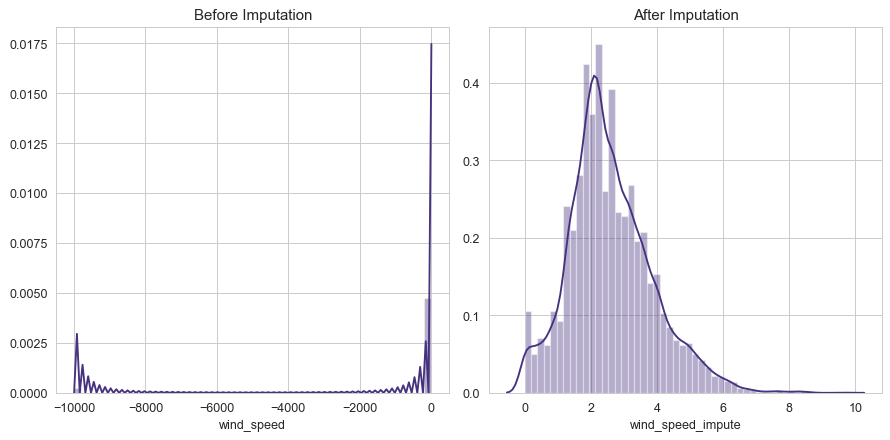

In [41]:
fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(10,5))

sns.distplot(df['wind_speed'],ax = axes[0])
axes[0].set_title('Before Imputation')

sns.distplot(df['wind_speed_impute'],ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout()

## Impute Wind Gusts

In [42]:
# checking for number of data errors

df[df['wind_gust']==-9999].shape[0]

3263

In [43]:
# function for replacing data errors for wind_gusts

def impute_windGust(data):
    month = data[0]
    wind_gust = data[1]
    if wind_gust == -9999:
        return df[df['wind_gust']!=-9999][df['month']==month]['wind_gust'].mean()
    else:
        return wind_gust

In [44]:
df['wind_gust_impute'] = df[['month','wind_gust']].apply(impute_windGust,axis=1)

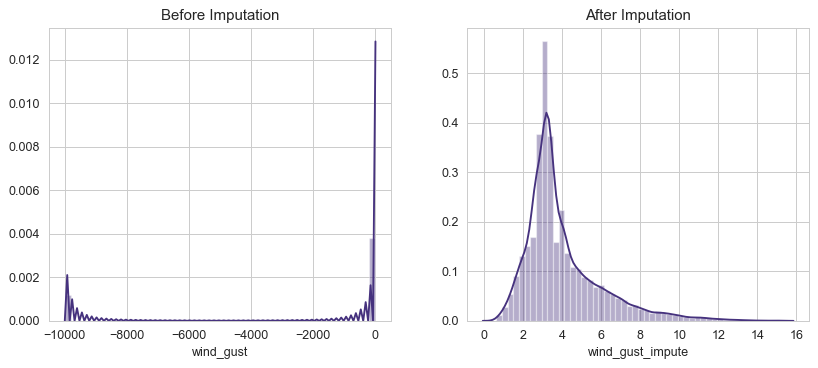

In [45]:
fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(10,5))

sns.distplot(df['wind_gust'],ax = axes[0])
axes[0].set_title('Before Imputation')

sns.distplot(df['wind_gust_impute'],ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout(pad=4.0)

## Impute Pressure

In [46]:
# checking for number of data errors

df[df['pressure']==-9999].shape[0]

2156

In [47]:
# function for replacing data errors for pressure

def impute_pressure(data):
    month = data[0]
    pressure = data[1]
    if pressure == -9999:
        return df[df['pressure']!=-9999][df['month']==month]['pressure'].mean()
    else:
        return pressure

In [48]:
df['pressure_impute'] = df[['month','pressure']].apply(impute_pressure,axis=1)

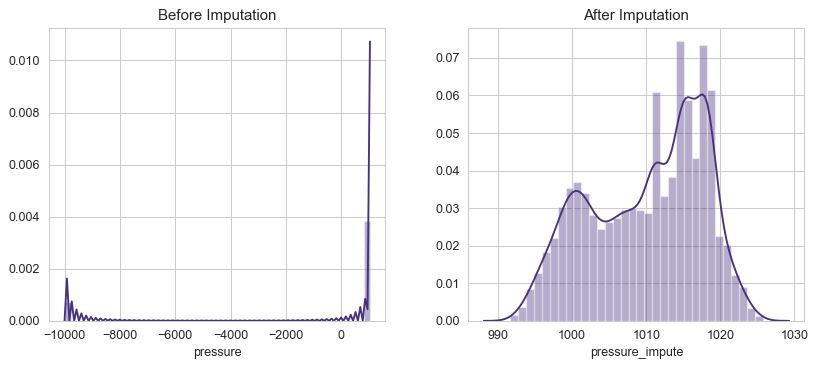

In [49]:
fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(10,5))

sns.distplot(df['pressure'],ax = axes[0])
axes[0].set_title('Before Imputation')

sns.distplot(df['pressure_impute'],ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout(pad=4.0)

## Impute UV Index

In [50]:
# checking for number of data errors

df[df['uv_index']==-9999].shape[0]

3263

In [51]:
df[df['uv_index']==-9999]['hour'].value_counts()

23    136
21    136
2     136
4     136
6     136
8     136
10    136
12    136
14    136
16    136
18    136
20    136
22    136
1     136
3     136
5     136
7     136
9     136
11    136
13    136
15    136
17    136
19    136
0     135
Name: hour, dtype: int64

In [52]:
# function for replacing data errors for uv_index

def impute_uv(data):
    month = data[0]
    uv_index = data[1]
    hour = data[2]
    if uv_index == -9999:
        if hour > 6 and hour < 19:
            return df[df['uv_index']!=-9999][df['month']==month][df['hour']==hour]['uv_index'].mean()
        else:
            return 0
    else:
        return uv_index

In [53]:
df['uv_index_impute'] = df[['month','uv_index','hour']].apply(impute_uv,axis=1)

In [54]:
# checking data after imputation

df[df['uv_index']==-9999][['uv_index','uv_index_impute']].sample(10)

,uv_index,uv_index_impute
1942,-9999,0.000000
3057,-9999,1.238095
2739,-9999,0.000000
3104,-9999,0.214286
2124,-9999,4.612903
3006,-9999,0.000000
3086,-9999,5.095238
1365,-9999,0.000000
2892,-9999,4.387097
988,-9999,0.000000


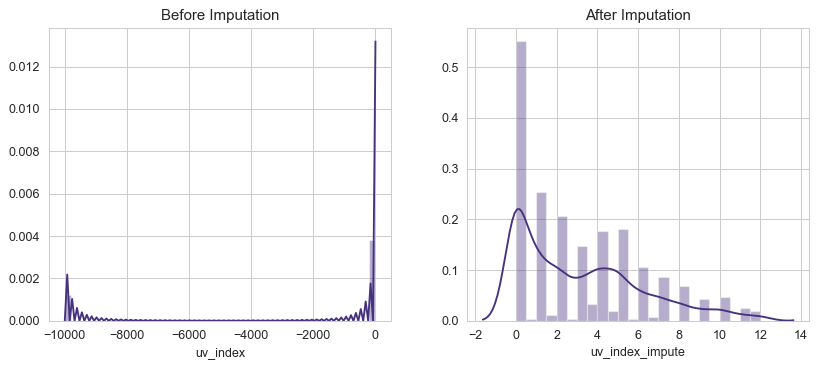

In [55]:
fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(10,5))

sns.distplot(df['uv_index'],ax = axes[0])
axes[0].set_title('Before Imputation')

sns.distplot(df[(df['hour']<19) & (df['hour']>5)]['uv_index_impute'],ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout(pad=4.0)

## Impute Ozone

In [56]:
# checking for number of data errors

df[df['ozone']==-9999].shape[0]

3263

In [57]:
# function for replacing data errors for ozone

def impute_ozone(data):
    month = data[0]
    ozone = data[1]
    if ozone == -9999:
        return df[df['ozone']!=-9999][df['month']==month]['ozone'].mean()
    else:
        return ozone

In [58]:
df['ozone_impute'] = df[['month','ozone']].apply(impute_ozone,axis=1)

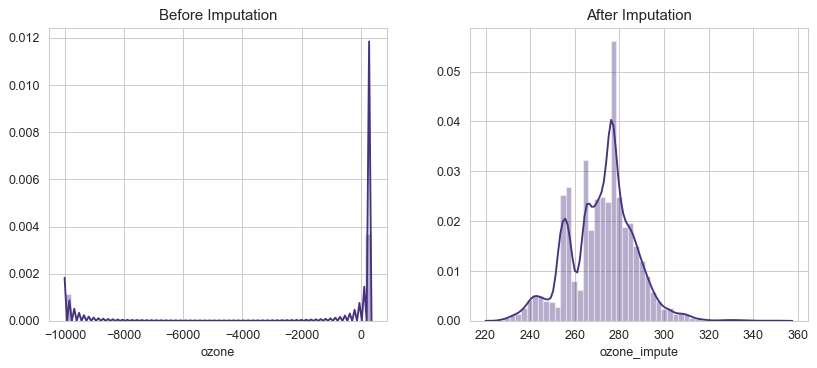

In [59]:
fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(10,5))

sns.distplot(df['ozone'],ax = axes[0])
axes[0].set_title('Before Imputation')

sns.distplot(df['ozone_impute'],ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout(pad=4.0)

## Impute visibility

In [60]:
# checking for number of data errors

df[df['visibility']==-9999].shape[0]

176

In [61]:
# function for replacing data errors for visibility

def impute_visibility(data):
    month = data[0]
    visibility = data[1]
    if visibility == -9999:
        return df[df['visibility']!=-9999][df['month']==month]['visibility'].mean()
    else:
        return visibility

In [62]:
df['visibility_impute'] = df[['month','visibility']].apply(impute_ozone,axis=1)

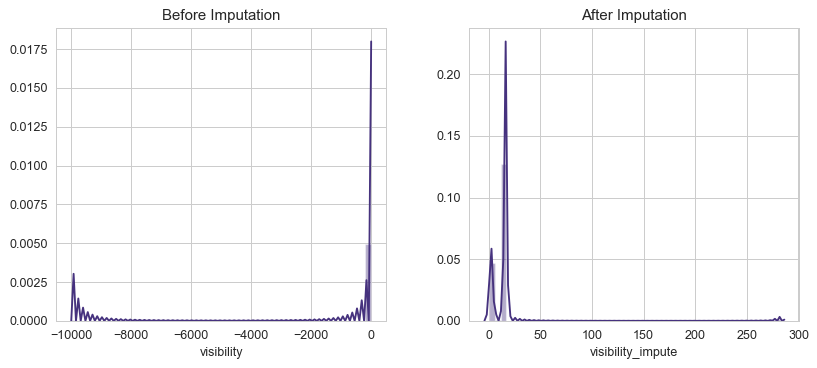

In [63]:
fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(10,5))

sns.distplot(df['visibility'],ax = axes[0])
axes[0].set_title('Before Imputation')

sns.distplot(df['visibility_impute'],ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout(pad=4.0)

## Impute Precipitation Intensity

In [64]:
# checking for number of data errors

df[df['precip_intensity']==-9999].shape[0]

3263

In [65]:
df[df['precip_intensity']==-9999][['datetime_local','precip_intensity']].head(20)

,datetime_local,precip_intensity
1,2017-10-01 01:00:00,-9999.0
2,2017-10-01 02:00:00,-9999.0
3,2017-10-01 03:00:00,-9999.0
4,2017-10-01 04:00:00,-9999.0
5,2017-10-01 05:00:00,-9999.0
6,2017-10-01 06:00:00,-9999.0
7,2017-10-01 07:00:00,-9999.0
8,2017-10-01 08:00:00,-9999.0
9,2017-10-01 09:00:00,-9999.0
10,2017-10-01 10:00:00,-9999.0


In [66]:
df[df['precip_intensity']!=-9999][df['month']==2]['precip_intensity'].mean()

0.017519841269841255

In [67]:
df[df['precip_intensity']!=-9999][df['month']==2][df['day']==13]['precip_intensity'].mean()

0.0

In [68]:
# function for replacing data errors for precip_intensity

def impute_precip_intensity(data):
    month = data[0]
    precip_intensity = data[1]
    day = data[2]
    if precip_intensity == -9999:
        return df[df['precip_intensity']!=-9999][df['month']==month][df['day']==day]['precip_intensity'].mean()
    else:
        return precip_intensity

In [69]:
df['precip_intensity_impute'] = df[['month','precip_intensity','day']].apply(impute_precip_intensity,axis=1)

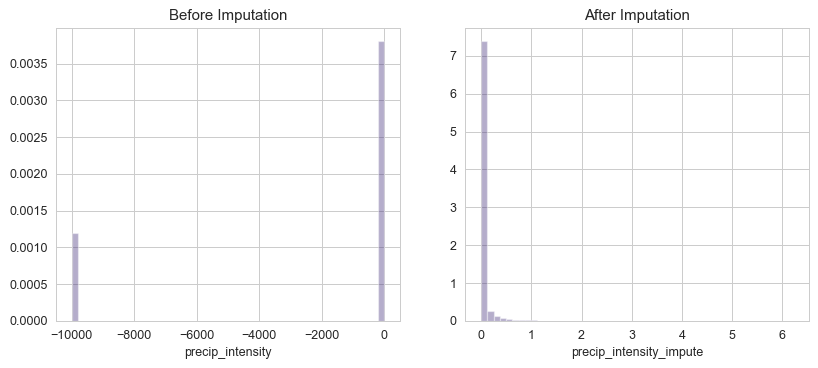

In [70]:
fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(10,5))

sns.distplot(df['precip_intensity'],ax = axes[0])
axes[0].set_title('Before Imputation')

sns.distplot(df['precip_intensity_impute'],ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout(pad=4.0)

## Impute Precipitation Probability

In [71]:
# checking for number of data errors

df[df['precip_probability']==-9999].shape[0]

3263

In [72]:
# function for replacing data errors for precip_probability

def impute_precip_probability(data):
    month = data[0]
    precip_probability = data[1]
    day = data[2]
    if precip_probability == -9999:
        return df[df['precip_probability']!=-9999][df['month']==month][df['day']==day]['precip_probability'].mean()
    else:
        return precip_probability

In [73]:
df['precip_probability_impute'] = df[['month','precip_probability','day']].apply(impute_precip_probability,axis=1)

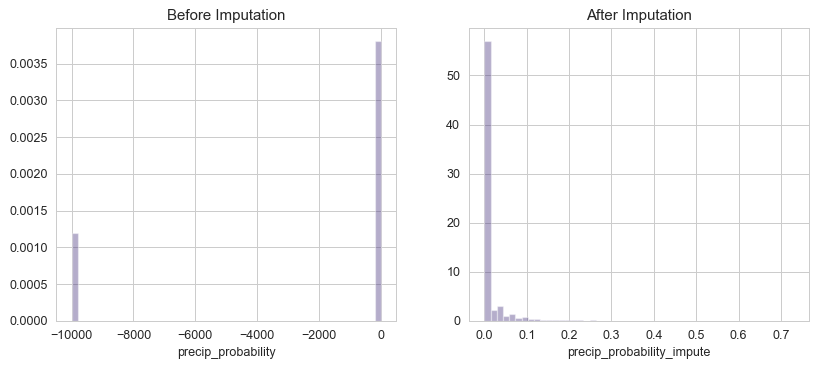

In [74]:
fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(10,5))

sns.distplot(df['precip_probability'],ax = axes[0])
axes[0].set_title('Before Imputation')

sns.distplot(df['precip_probability_impute'],ax = axes[1])
axes[1].set_title('After Imputation')

plt.tight_layout(pad=4.0)

## *distributions of original feature (data error removed) for reference*

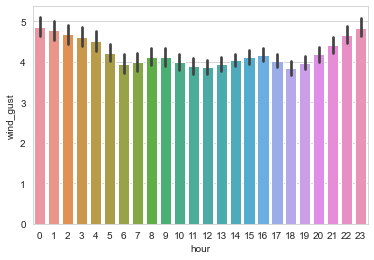

In [75]:
sns.barplot(x='hour',y='wind_gust',data=df[df['wind_gust']!=-9999])

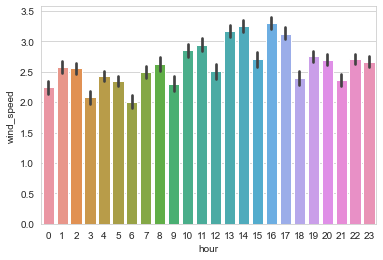

In [76]:
sns.barplot(x='hour',y='wind_speed',data=df[df['wind_speed']!=-9999])

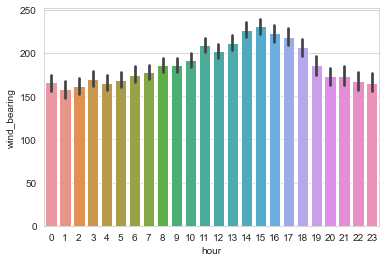

In [77]:
sns.barplot(x='hour',y='wind_bearing',data=df[df['wind_bearing']!=-9999])

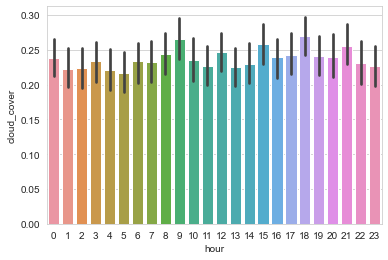

In [78]:
sns.barplot(x='hour',y='cloud_cover',data=df[df['cloud_cover']!=-9999])

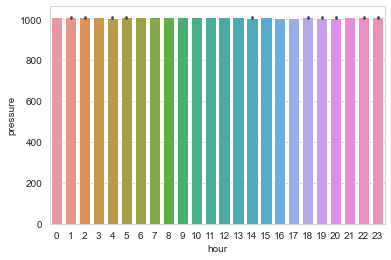

In [79]:
sns.barplot(x='hour',y='pressure',data=df[df['pressure']!=-9999])

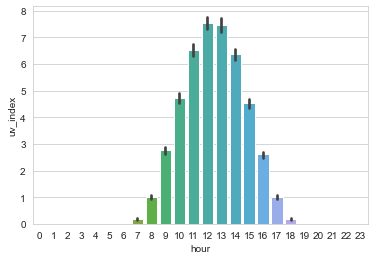

In [80]:
sns.barplot(x='hour',y='uv_index',data=df[df['uv_index']!=-9999])

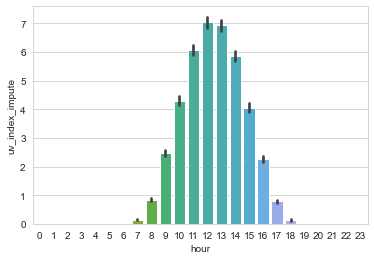

In [81]:
sns.barplot(x='hour',y='uv_index_impute',data=df)

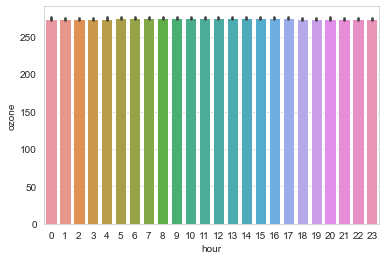

In [82]:
sns.barplot(x='hour',y='ozone',data=df[df['ozone']!=-9999])

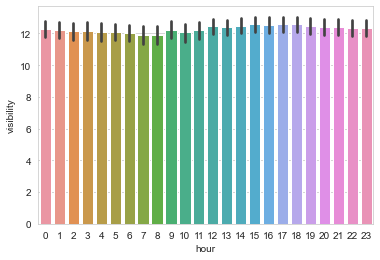

In [83]:
sns.barplot(x='hour',y='visibility',data=df[df['visibility']!=-9999])

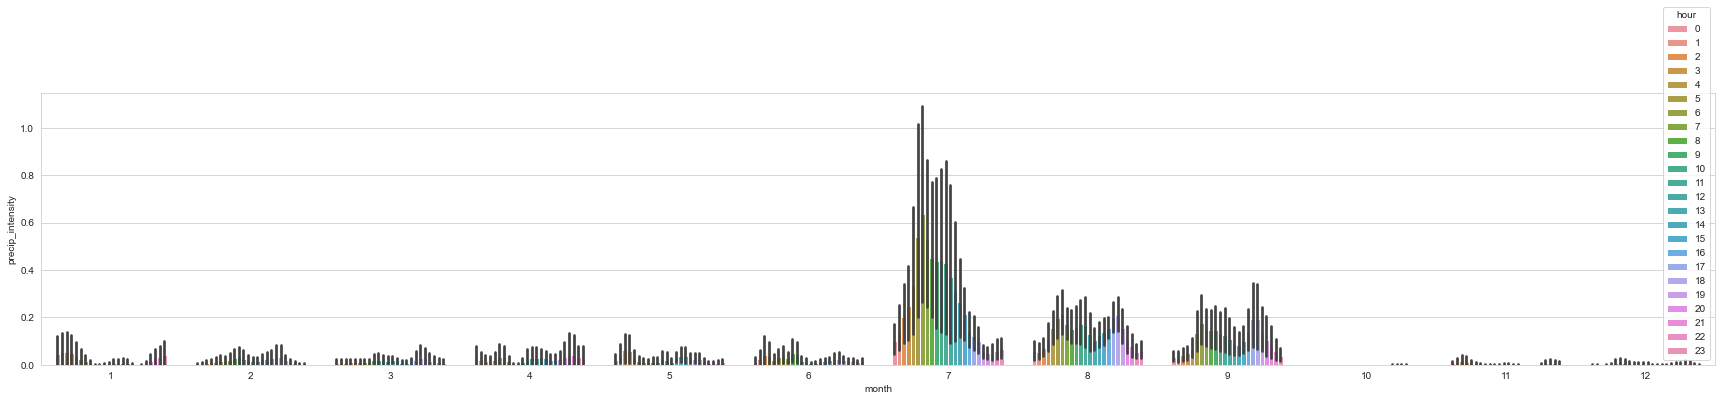

In [84]:
plt.figure(figsize=(30,5))
sns.barplot(x='month',y='precip_intensity',data=df[df['precip_intensity']!=-9999],hue='hour')

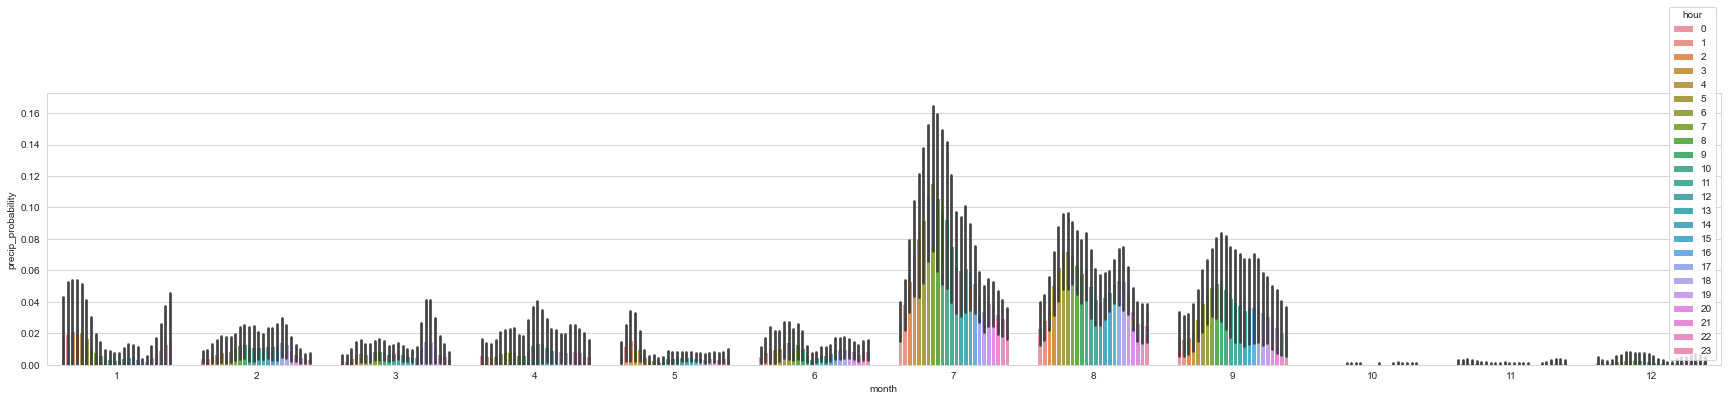

In [85]:
plt.figure(figsize=(30,5))
sns.barplot(x='month',y='precip_probability',data=df[df['precip_probability']!=-9999],hue='hour')

---
## Fixing Cumulative Power (target)

In [86]:
df.shape

(13618, 35)

In [87]:
df.columns

Index(['datetime_local', 'cloud_cover', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'wind_bearing', 'wind_speed', 'wind_gust',
       'pressure', 'uv_index', 'ozone', 'precip_intensity',
       'precip_probability', 'precip_type', 'visibility', 'sunrise', 'sunset',
       'icon', 'summary', 'Cum Power', 'year', 'month', 'day', 'hour',
       'cloud_cover_impute', 'wind_bearing_impute', 'wind_speed_impute',
       'wind_gust_impute', 'pressure_impute', 'uv_index_impute',
       'ozone_impute', 'visibility_impute', 'precip_intensity_impute',
       'precip_probability_impute'],
      dtype='object')

In [88]:
# removing skewed features

train = df[['datetime_local','year', 'month', 'day', 'hour','cloud_cover_impute', 'wind_bearing_impute', 'wind_speed_impute',
       'wind_gust_impute', 'pressure_impute', 'uv_index_impute',
       'ozone_impute', 'visibility_impute', 'precip_intensity_impute',
       'precip_probability_impute', 'apparent_temperature', 'temperature',
       'humidity', 'dew_point', 'precip_type','sunrise', 'sunset','summary', 'Cum Power']]

In [89]:
train.shape

(13618, 24)

In [90]:
# checking brief stats on Cum Power

train['Cum Power'].describe()

count    13618.000000
mean       143.929577
std       2205.648351
min          0.000000
25%          0.000000
50%          0.000000
75%         23.377500
max      60222.370000
Name: Cum Power, dtype: float64

In [91]:
train[train['hour']==5]['Cum Power'].mean()

0.0

In [92]:
train[train['hour']==6]['Cum Power'].mean()

2.0522927689594357

In [93]:
train[train['hour']==18]['Cum Power'].mean()

70.2976408450704

In [94]:
train[train['hour']==19]['Cum Power'].mean()

0.0

In [95]:
train[(train['hour'] > 18) | (train['hour'] < 6 )]['hour'].shape[0]

6241

In [96]:
# No power is generated from 6pm - 6am

train[(train['hour'] > 18) | (train['hour'] < 6 )]['Cum Power'].describe()

count    6241.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Cum Power, dtype: float64

In [97]:
# thus filtering data from 6pm - 6am

train = train[(train['hour'] > 5 ) & (train['hour'] < 19 )]

In [98]:
# checking stats on cum power

train[train['Cum Power']!=0]['Cum Power'].describe()

count     5998.00000
mean       326.78109
std       3314.60654
min          0.01000
25%          8.26000
50%         29.97000
75%         46.95000
max      60222.37000
Name: Cum Power, dtype: float64

In [99]:
# checking stats for power generated in July 2019

train[train['Cum Power']!=0][train['month']==7]['Cum Power'].describe()

count      237.000000
mean      7570.081477
std      14977.183873
min          0.010000
25%         16.620000
50%         41.070000
75%       5191.470000
max      60222.370000
Name: Cum Power, dtype: float64

In [100]:
# checking for other months

train[train['Cum Power']!=0][train['month']!=7]['Cum Power'].describe()

count    5761.000000
mean       28.801193
std        20.085804
min         0.010000
25%         8.000000
50%        29.470000
75%        46.590000
max        70.900000
Name: Cum Power, dtype: float64

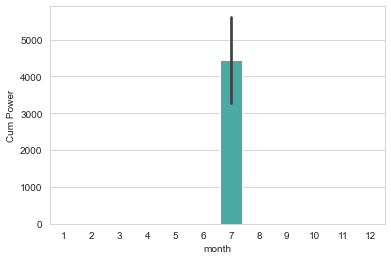

In [101]:
# power generated july 2019 is extremely high

sns.barplot(x='month',y='Cum Power',data=train)

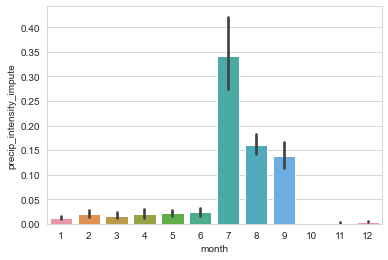

In [102]:
sns.barplot(x='month',y='precip_intensity_impute',data=train)

## Fixing Data for  the month of JULY

In [103]:
train.reset_index(inplace=True)

In [104]:
train.hour.unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18], dtype=int64)

In [105]:
train[train['month']==7]

,index,datetime_local,year,month,day,hour,cloud_cover_impute,wind_bearing_impute,wind_speed_impute,wind_gust_impute,pressure_impute,uv_index_impute,ozone_impute,visibility_impute,precip_intensity_impute,precip_probability_impute,apparent_temperature,temperature,humidity,dew_point,precip_type,sunrise,sunset,summary,Cum Power
6181,11417,2019-07-01 06:00:00,2019,7,1,6,0.03,170.0,3.48,7.15,997.15,0.0,297.6,16.09,0.00,0.00,35.23,33,0,19.96,none,2019-07-01 00:03:49,2019-07-01 14:01:39,Clear,0.61
6182,11418,2019-07-01 07:00:00,2019,7,1,7,0.07,270.0,3.99,6.66,997.25,1.0,297.7,16.09,0.00,0.00,37.22,34,0,20.67,none,2019-07-01 00:03:49,2019-07-01 14:01:39,Clear,9.36
6183,11419,2019-07-01 08:00:00,2019,7,1,8,0.11,295.0,4.50,7.76,997.45,2.0,297.5,16.09,0.00,0.00,39.07,36,0,20.67,none,2019-07-01 00:03:49,2019-07-01 14:01:39,Clear,18.66
6184,11420,2019-07-01 09:00:00,2019,7,1,9,0.12,249.0,4.43,7.66,997.56,4.0,296.9,16.09,0.00,0.00,40.76,37,0,20.43,none,2019-07-01 00:03:49,2019-07-01 14:01:39,Clear,29.73
6185,11421,2019-07-01 10:00:00,2019,7,1,10,0.09,278.0,3.90,6.37,997.47,7.0,296.0,16.09,0.00,0.00,42.38,39,0,20.22,none,2019-07-01 00:03:49,2019-07-01 14:01:39,Clear,41.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,12145,2019-07-31 14:00:00,2019,7,31,14,0.96,109.0,5.46,6.54,999.13,5.0,275.2,16.09,0.11,0.02,43.05,34,1,25.92,rain,2019-07-31 00:19:06,2019-07-31 13:51:42,Humid and Overcast,49.29
6580,12146,2019-07-31 15:00:00,2019,7,31,15,1.00,103.0,5.29,5.81,998.47,4.0,275.3,16.09,0.12,0.03,42.84,34,1,25.80,rain,2019-07-31 00:19:06,2019-07-31 13:51:42,Humid and Overcast,40.18
6581,12147,2019-07-31 16:00:00,2019,7,31,16,1.00,99.0,4.97,5.12,997.82,3.0,275.4,16.09,0.07,0.03,42.49,34,1,25.64,rain,2019-07-31 00:19:06,2019-07-31 13:51:42,Humid and Overcast,35.78
6582,12148,2019-07-31 17:00:00,2019,7,31,17,1.00,94.0,3.80,3.97,997.65,2.0,277.3,16.09,0.02,0.03,42.43,34,1,25.63,rain,2019-07-31 00:19:06,2019-07-31 13:51:42,Humid and Overcast,17.15


In [106]:
# splitting data into 3 sections
# 1st data before July 2019
# 2nd data of July 2019
# 3rd data after July 2019

data1 = train.iloc[:6181,:]
data2 = train.iloc[6181:6584,:]
data3 = train.iloc[6584:,:]

In [107]:
# replacing all outliers with 100

def july_power(data):
    power = data[0]
    hour = data[1]
    if power > 60:
        return 100
    else:
        return power
    
data2['CumPower_impute'] = data2[['Cum Power','hour']].apply(july_power,axis=1)

In [108]:
# imputing all outliers with hourwise mean of initial data of July

def july_power_impute(data):
    power = data[0]
    hour = data[1]
    
    if power == 100:
        return data2[data2['CumPower_impute'] != 0][data2['CumPower_impute'] != 100][data2['hour']==hour]['CumPower_impute'].mean()
    else:
        return power
    
data2['Cum Power'] = data2[['CumPower_impute','hour']].apply(july_power_impute,axis=1)

In [109]:
# checking data

data2.head()

,index,datetime_local,year,month,day,hour,cloud_cover_impute,wind_bearing_impute,wind_speed_impute,wind_gust_impute,pressure_impute,uv_index_impute,ozone_impute,visibility_impute,precip_intensity_impute,precip_probability_impute,apparent_temperature,temperature,humidity,dew_point,precip_type,sunrise,sunset,summary,Cum Power,CumPower_impute
6181,11417,2019-07-01 06:00:00,2019,7,1,6,0.03,170.0,3.48,7.15,997.15,0.0,297.6,16.09,0.0,0.0,35.23,33,0,19.96,none,2019-07-01 00:03:49,2019-07-01 14:01:39,Clear,0.61,0.61
6182,11418,2019-07-01 07:00:00,2019,7,1,7,0.07,270.0,3.99,6.66,997.25,1.0,297.7,16.09,0.0,0.0,37.22,34,0,20.67,none,2019-07-01 00:03:49,2019-07-01 14:01:39,Clear,9.36,9.36
6183,11419,2019-07-01 08:00:00,2019,7,1,8,0.11,295.0,4.50,7.76,997.45,2.0,297.5,16.09,0.0,0.0,39.07,36,0,20.67,none,2019-07-01 00:03:49,2019-07-01 14:01:39,Clear,18.66,18.66
6184,11420,2019-07-01 09:00:00,2019,7,1,9,0.12,249.0,4.43,7.66,997.56,4.0,296.9,16.09,0.0,0.0,40.76,37,0,20.43,none,2019-07-01 00:03:49,2019-07-01 14:01:39,Clear,29.73,29.73
6185,11421,2019-07-01 10:00:00,2019,7,1,10,0.09,278.0,3.90,6.37,997.47,7.0,296.0,16.09,0.0,0.0,42.38,39,0,20.22,none,2019-07-01 00:03:49,2019-07-01 14:01:39,Clear,41.91,41.91


In [110]:
# dropping unnecessary columns
data2.drop(['CumPower_impute'],axis=1,inplace=True)

In [111]:
# concatenating all 3 sections once again

train_final = pd.concat([data1,data2,data3])
train_final.head()

,index,datetime_local,year,month,day,hour,cloud_cover_impute,wind_bearing_impute,wind_speed_impute,wind_gust_impute,pressure_impute,uv_index_impute,ozone_impute,visibility_impute,precip_intensity_impute,precip_probability_impute,apparent_temperature,temperature,humidity,dew_point,precip_type,sunrise,sunset,summary,Cum Power
0,6,2017-10-01 06:00:00,2017,10,1,6,0.0,120.0,0.83,3.135591,1008.650000,0.000000,276.668548,3.56,0.0,0.0,21.87,22,1,19.46,rain,2017-10-01 00:52:02,2017-10-01 12:45:07,Clear,0.00
1,7,2017-10-01 07:00:00,2017,10,1,7,0.0,120.0,0.83,3.135591,1011.175736,0.000000,276.668548,3.06,0.0,0.0,25.23,25,1,19.46,rain,2017-10-01 00:52:02,2017-10-01 12:45:07,Foggy,0.42
2,8,2017-10-01 08:00:00,2017,10,1,8,0.0,120.0,0.83,3.135591,1011.175736,1.000000,276.668548,3.30,0.0,0.0,24.29,24,1,19.46,rain,2017-10-01 00:52:02,2017-10-01 12:45:07,Clear,7.56
3,9,2017-10-01 09:00:00,2017,10,1,9,0.0,237.0,0.83,3.135591,1009.950000,2.419355,276.668548,3.85,0.0,0.0,26.56,26,1,19.46,rain,2017-10-01 00:52:02,2017-10-01 12:45:07,Clear,24.46
4,10,2017-10-01 10:00:00,2017,10,1,10,0.0,281.0,0.83,3.135591,1011.175736,4.451613,276.668548,3.54,0.0,0.0,32.03,31,0,19.46,rain,2017-10-01 00:52:02,2017-10-01 12:45:07,Clear,35.94


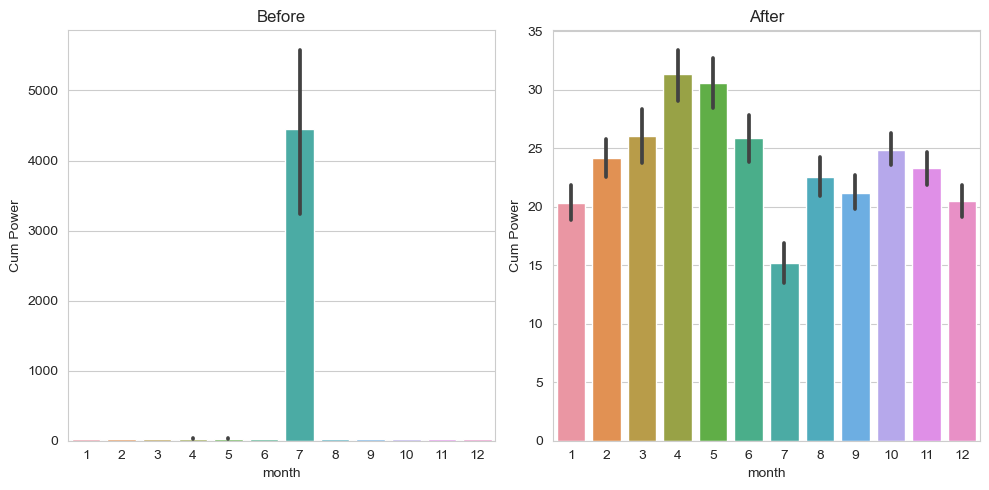

In [112]:
# plot of distribution of power on months before and after imputing July Power

fig, axes = plt.subplots(ncols=2,nrows=1,dpi=100,figsize=(10,5))

sns.barplot(x='month',y='Cum Power',data=train,ax=axes[0])
axes[0].set_title('Before')

sns.barplot(x='month',y='Cum Power',data=train_final,ax=axes[1])
axes[1].set_title('After')

plt.tight_layout()

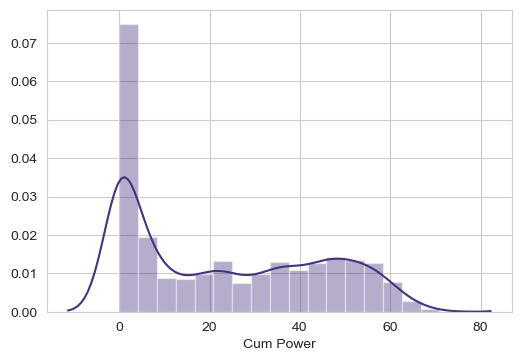

In [113]:
# distribution of power

plt.figure(dpi=100)
sns.distplot(train_final['Cum Power'])

In [114]:
# checking for any records with Cumulative Power still 0

train_final[train_final['Cum Power'] == 0].shape

(1379, 25)

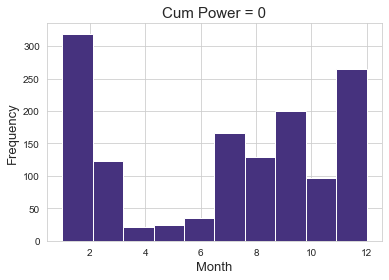

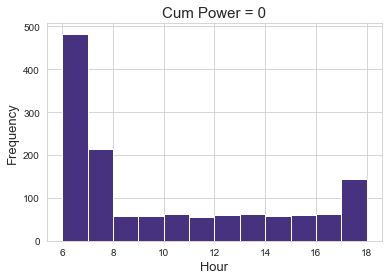

In [115]:
train_final[train_final['Cum Power'] == 0]['month'].plot(kind='hist')
plt.title('Cum Power = 0',fontsize=15)
plt.xlabel('Month',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

train_final[train_final['Cum Power'] == 0]['hour'].plot(kind='hist',bins=12)
plt.title('Cum Power = 0',fontsize=15)
plt.xlabel('Hour',fontsize=13)
plt.ylabel('Frequency',fontsize=13)
plt.show()

**For months like Jan, Feb, Nov, Dec avg power generated btw 6-8am and 5-6pm is nearly 0**

In [116]:
train_final.shape

(7377, 25)

In [117]:
# removing all records with Cum Power = 0

train_final = train_final[train_final['Cum Power']!=0]

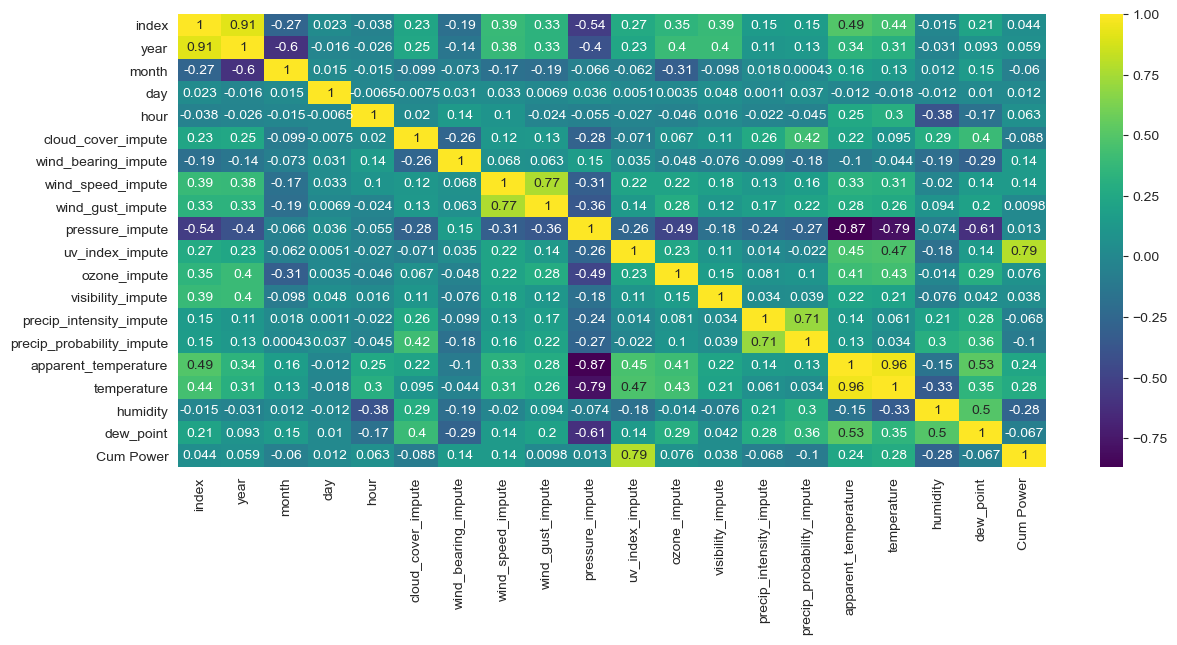

In [118]:
# correlation matrix

plt.figure(figsize=(14,6),dpi=100)
sns.heatmap(train_final.corr(),annot=True,cmap='viridis')
plt.show()

In [119]:
train_final.head(5)

,index,datetime_local,year,month,day,hour,cloud_cover_impute,wind_bearing_impute,wind_speed_impute,wind_gust_impute,pressure_impute,uv_index_impute,ozone_impute,visibility_impute,precip_intensity_impute,precip_probability_impute,apparent_temperature,temperature,humidity,dew_point,precip_type,sunrise,sunset,summary,Cum Power
1,7,2017-10-01 07:00:00,2017,10,1,7,0.0,120.0,0.83,3.135591,1011.175736,0.000000,276.668548,3.06,0.0,0.0,25.23,25,1,19.46,rain,2017-10-01 00:52:02,2017-10-01 12:45:07,Foggy,0.42
2,8,2017-10-01 08:00:00,2017,10,1,8,0.0,120.0,0.83,3.135591,1011.175736,1.000000,276.668548,3.30,0.0,0.0,24.29,24,1,19.46,rain,2017-10-01 00:52:02,2017-10-01 12:45:07,Clear,7.56
3,9,2017-10-01 09:00:00,2017,10,1,9,0.0,237.0,0.83,3.135591,1009.950000,2.419355,276.668548,3.85,0.0,0.0,26.56,26,1,19.46,rain,2017-10-01 00:52:02,2017-10-01 12:45:07,Clear,24.46
4,10,2017-10-01 10:00:00,2017,10,1,10,0.0,281.0,0.83,3.135591,1011.175736,4.451613,276.668548,3.54,0.0,0.0,32.03,31,0,19.46,rain,2017-10-01 00:52:02,2017-10-01 12:45:07,Clear,35.94
5,11,2017-10-01 11:00:00,2017,10,1,11,0.0,278.0,0.83,3.135591,1011.175736,6.322581,276.668548,3.78,0.0,0.0,33.31,32,0,19.46,rain,2017-10-01 00:52:02,2017-10-01 12:45:07,Clear,45.43


In [120]:
# removing index, sunrise and sunset columns

train_final.drop(['index','sunrise','sunset'],axis=1,inplace=True)

In [121]:
# exporting train_final to a csv file (for later usability)

train_final.to_csv('train.csv',index=False)

## Handling Categorical Features

In [122]:
train_final.head(5)

,datetime_local,year,month,day,hour,cloud_cover_impute,wind_bearing_impute,wind_speed_impute,wind_gust_impute,pressure_impute,uv_index_impute,ozone_impute,visibility_impute,precip_intensity_impute,precip_probability_impute,apparent_temperature,temperature,humidity,dew_point,precip_type,summary,Cum Power
1,2017-10-01 07:00:00,2017,10,1,7,0.0,120.0,0.83,3.135591,1011.175736,0.000000,276.668548,3.06,0.0,0.0,25.23,25,1,19.46,rain,Foggy,0.42
2,2017-10-01 08:00:00,2017,10,1,8,0.0,120.0,0.83,3.135591,1011.175736,1.000000,276.668548,3.30,0.0,0.0,24.29,24,1,19.46,rain,Clear,7.56
3,2017-10-01 09:00:00,2017,10,1,9,0.0,237.0,0.83,3.135591,1009.950000,2.419355,276.668548,3.85,0.0,0.0,26.56,26,1,19.46,rain,Clear,24.46
4,2017-10-01 10:00:00,2017,10,1,10,0.0,281.0,0.83,3.135591,1011.175736,4.451613,276.668548,3.54,0.0,0.0,32.03,31,0,19.46,rain,Clear,35.94
5,2017-10-01 11:00:00,2017,10,1,11,0.0,278.0,0.83,3.135591,1011.175736,6.322581,276.668548,3.78,0.0,0.0,33.31,32,0,19.46,rain,Clear,45.43


In [123]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5998 entries, 1 to 7363
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   datetime_local             5998 non-null   datetime64[ns]
 1   year                       5998 non-null   int64         
 2   month                      5998 non-null   int64         
 3   day                        5998 non-null   int64         
 4   hour                       5998 non-null   int64         
 5   cloud_cover_impute         5998 non-null   float64       
 6   wind_bearing_impute        5998 non-null   float64       
 7   wind_speed_impute          5998 non-null   float64       
 8   wind_gust_impute           5998 non-null   float64       
 9   pressure_impute            5998 non-null   float64       
 10  uv_index_impute            5998 non-null   float64       
 11  ozone_impute               5998 non-null   float64       
 12  visibi

In [124]:
# imputing precip_type as rain where precip_probability > 0, otherwise none

train_final['precip_type'] = np.where(train_final['precip_probability_impute'] == 0,'none','rain')

In [125]:
train_final[['precip_probability_impute','precip_type']].sample(10)

,precip_probability_impute,precip_type
5993,0.04,rain
5292,0.01,rain
4333,0.00,none
1238,0.00,none
4611,0.06,rain
5152,0.00,none
3604,0.00,none
606,0.00,none
2501,0.00,none
4789,0.00,none


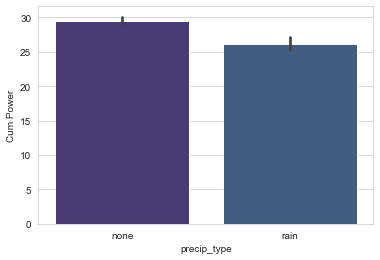

In [126]:
sns.barplot(x='precip_type',y='Cum Power',data=train_final)

In [127]:
# summary column

train_final['summary'].value_counts()

Clear                            2550
Foggy                            1205
Partly Cloudy                     578
Humid and Mostly Cloudy           344
Humid and Overcast                288
Mostly Cloudy                     283
Overcast                          282
Humid                             220
Humid and Partly Cloudy           216
Possible Light Rain and Humid      22
Possible Light Rain                 6
Light Rain and Humid                1
Humid and Foggy                     1
Rain                                1
Breezy and Foggy                    1
Name: summary, dtype: int64

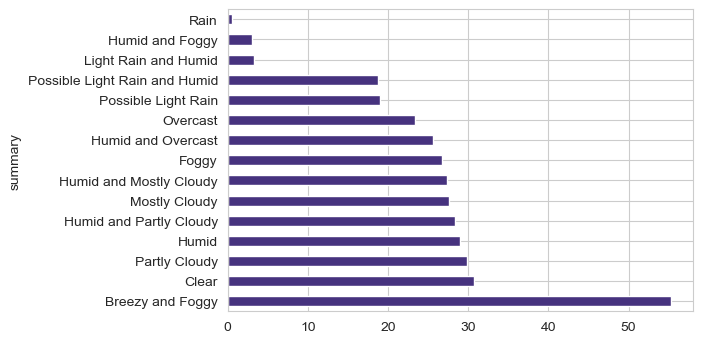

In [128]:
plt.figure(dpi=100)
train_final.groupby('summary')['Cum Power'].mean().sort_values(ascending=False).plot(kind='barh')

In [129]:
train_final.groupby('summary')['Cum Power'].mean()

summary
Breezy and Foggy                 55.240000
Clear                            30.694306
Foggy                            26.717402
Humid                            29.029412
Humid and Foggy                   3.000000
Humid and Mostly Cloudy          27.325611
Humid and Overcast               25.600637
Humid and Partly Cloudy          28.380910
Light Rain and Humid              3.280000
Mostly Cloudy                    27.587067
Overcast                         23.382057
Partly Cloudy                    29.899689
Possible Light Rain              18.971667
Possible Light Rain and Humid    18.769974
Rain                              0.480000
Name: Cum Power, dtype: float64

In [130]:
consistent_weather = ['Clear',
 'Foggy',
 'Partly Cloudy',
 'Humid and Mostly Cloudy',
 'Humid and Overcast',
 'Mostly Cloudy',
 'Overcast',
 'Humid',
 'Humid and Partly Cloudy',
 'Possible Light Rain and Humid']

In [131]:
train_final.shape

(5998, 22)

In [132]:
train_final = train_final[train_final['summary'].isin(consistent_weather)]

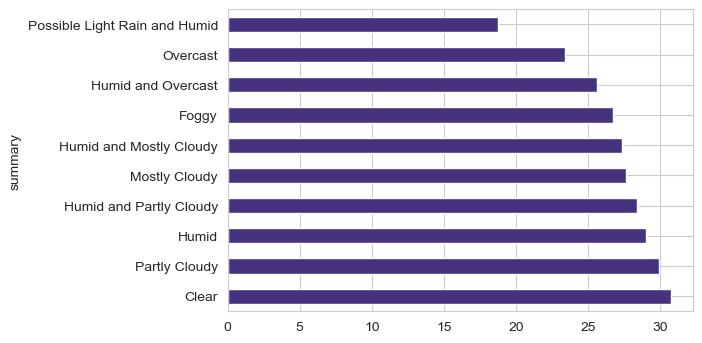

In [133]:
plt.figure(dpi=100)
train_final.groupby('summary')['Cum Power'].mean().sort_values(ascending=False).plot(kind='barh')

In [134]:
train_final.head()

,datetime_local,year,month,day,hour,cloud_cover_impute,wind_bearing_impute,wind_speed_impute,wind_gust_impute,pressure_impute,uv_index_impute,ozone_impute,visibility_impute,precip_intensity_impute,precip_probability_impute,apparent_temperature,temperature,humidity,dew_point,precip_type,summary,Cum Power
1,2017-10-01 07:00:00,2017,10,1,7,0.0,120.0,0.83,3.135591,1011.175736,0.000000,276.668548,3.06,0.0,0.0,25.23,25,1,19.46,none,Foggy,0.42
2,2017-10-01 08:00:00,2017,10,1,8,0.0,120.0,0.83,3.135591,1011.175736,1.000000,276.668548,3.30,0.0,0.0,24.29,24,1,19.46,none,Clear,7.56
3,2017-10-01 09:00:00,2017,10,1,9,0.0,237.0,0.83,3.135591,1009.950000,2.419355,276.668548,3.85,0.0,0.0,26.56,26,1,19.46,none,Clear,24.46
4,2017-10-01 10:00:00,2017,10,1,10,0.0,281.0,0.83,3.135591,1011.175736,4.451613,276.668548,3.54,0.0,0.0,32.03,31,0,19.46,none,Clear,35.94
5,2017-10-01 11:00:00,2017,10,1,11,0.0,278.0,0.83,3.135591,1011.175736,6.322581,276.668548,3.78,0.0,0.0,33.31,32,0,19.46,none,Clear,45.43


In [135]:
rename_col = {
    'cloud_cover_impute' : 'cloud_cover',
    'wind_bearing_impute' : 'wind_bearing',
    'wind_speed_impute' : 'wind_speed',
    'wind_gust_impute' : 'wind_gust',
    'pressure_impute' : 'pressure',
    'uv_index_impute' : 'uv_index',
    'ozone_impute' : 'ozone',
    'visibility_impute' : 'visibility',
    'precip_intensity_impute' : 'precip_intensity',
    'precip_probability_impute' : 'precip_probability'
}

In [136]:
train_final.rename(rename_col,axis=1,inplace=True)

In [137]:
train_final.columns

Index(['datetime_local', 'year', 'month', 'day', 'hour', 'cloud_cover',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'visibility', 'precip_intensity', 'precip_probability',
       'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'precip_type', 'summary', 'Cum Power'],
      dtype='object')

## Cleaning weather_forecast.csv

In [138]:
test = pd.read_csv('weather_forecast.csv')

In [139]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            648 non-null    int64  
 1   plant_id              648 non-null    int64  
 2   datetime_utc          648 non-null    object 
 3   datetime_local        648 non-null    object 
 4   cloud_cover           648 non-null    float64
 5   apparent_temperature  648 non-null    float64
 6   temperature           648 non-null    int64  
 7   humidity              648 non-null    int64  
 8   dew_point             648 non-null    float64
 9   wind_bearing          648 non-null    int64  
 10  wind_speed            648 non-null    float64
 11  wind_chill            0 non-null      float64
 12  wind_gust             648 non-null    float64
 13  heat_index            0 non-null      float64
 14  pressure              648 non-null    float64
 15  qpf                   0

In [140]:
test.shape

(648, 31)

In [141]:
test.head()

,Unnamed: 0,plant_id,datetime_utc,datetime_local,cloud_cover,apparent_temperature,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_chill,wind_gust,heat_index,pressure,qpf,uv_index,snow,pop,fctcode,ozone,precip_accumulation,precip_intensity,precip_probability,precip_type,visibility,sunrise,sunset,icon,summary,updated_at
0,0,1,2019-09-30 18:30:00,2019-10-01 00:00:00,0.35,26.41,26,1,22.01,101,3.08,NaN,6.42,NaN,1008.45,NaN,0,NaN,NaN,NaN,268.6,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
1,1,1,2019-09-30 19:30:00,2019-10-01 01:00:00,0.43,25.95,25,1,22.06,105,2.94,NaN,6.28,NaN,1008.24,NaN,0,NaN,NaN,NaN,269.1,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
2,2,1,2019-09-30 20:30:00,2019-10-01 02:00:00,0.48,25.46,25,1,22.06,106,2.82,NaN,6.08,NaN,1007.90,NaN,0,NaN,NaN,NaN,269.7,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
3,3,1,2019-09-30 21:30:00,2019-10-01 03:00:00,0.49,24.80,24,1,21.87,106,2.63,NaN,5.74,NaN,1007.61,NaN,0,NaN,NaN,NaN,270.4,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38
4,4,1,2019-09-30 22:30:00,2019-10-01 04:00:00,0.49,23.99,23,1,21.53,100,2.39,NaN,5.30,NaN,1007.51,NaN,0,NaN,NaN,NaN,271.3,NaN,0.0,0.0,NaN,16.09,2019-10-01 00:51:47,2019-10-01 12:45:42,partly-cloudy-night,Partly Cloudy,2019-10-02 23:32:38


In [142]:
test.columns

Index(['Unnamed: 0', 'plant_id', 'datetime_utc', 'datetime_local',
       'cloud_cover', 'apparent_temperature', 'temperature', 'humidity',
       'dew_point', 'wind_bearing', 'wind_speed', 'wind_chill', 'wind_gust',
       'heat_index', 'pressure', 'qpf', 'uv_index', 'snow', 'pop', 'fctcode',
       'ozone', 'precip_accumulation', 'precip_intensity',
       'precip_probability', 'precip_type', 'visibility', 'sunrise', 'sunset',
       'icon', 'summary', 'updated_at'],
      dtype='object')

In [143]:
# dropping unnecessary columns

drop_col = ['Unnamed: 0', 'plant_id', 'datetime_utc', 'snow', 'pop', 'fctcode', 'sunrise', 'sunset',
       'icon', 'heat_index', 'qpf', 'precip_accumulation','wind_chill']

test.drop(drop_col,axis=1,inplace=True)

In [144]:
test.drop(['updated_at'],axis=1,inplace=True)

In [145]:
test['datetime_local'] = pd.to_datetime(test['datetime_local'])

In [146]:
test['year'] = test['datetime_local'].apply(lambda dt : dt.year)

In [147]:
test['month'] = test['datetime_local'].apply(lambda dt : dt.month)

In [148]:
test['day'] = test['datetime_local'].apply(lambda dt : dt.day)

In [149]:
test['hour'] = test['datetime_local'].apply(lambda dt : dt.hour)

In [150]:
test['precip_type'] = np.where(test['precip_probability'] == 0,'none','rain')

In [151]:
test = test[['datetime_local', 'year', 'month', 'day', 'hour', 'cloud_cover',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'visibility', 'precip_intensity', 'precip_probability',
       'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'precip_type', 'summary']]

In [152]:
train_final.to_csv('train.csv',index=False)

In [153]:
test.to_csv('test.csv',index=False)

In [154]:
# now we're gonna combine train_final and test to handle categorical features

merged = pd.concat([train_final,test])
merged

,datetime_local,year,month,day,hour,cloud_cover,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,visibility,precip_intensity,precip_probability,apparent_temperature,temperature,humidity,dew_point,precip_type,summary,Cum Power
1,2017-10-01 07:00:00,2017,10,1,7,0.0,120.0,0.83,3.135591,1011.175736,0.000000,276.668548,3.06,0.0,0.0,25.23,25,1,19.46,none,Foggy,0.42
2,2017-10-01 08:00:00,2017,10,1,8,0.0,120.0,0.83,3.135591,1011.175736,1.000000,276.668548,3.30,0.0,0.0,24.29,24,1,19.46,none,Clear,7.56
3,2017-10-01 09:00:00,2017,10,1,9,0.0,237.0,0.83,3.135591,1009.950000,2.419355,276.668548,3.85,0.0,0.0,26.56,26,1,19.46,none,Clear,24.46
4,2017-10-01 10:00:00,2017,10,1,10,0.0,281.0,0.83,3.135591,1011.175736,4.451613,276.668548,3.54,0.0,0.0,32.03,31,0,19.46,none,Clear,35.94
5,2017-10-01 11:00:00,2017,10,1,11,0.0,278.0,0.83,3.135591,1011.175736,6.322581,276.668548,3.78,0.0,0.0,33.31,32,0,19.46,none,Clear,45.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2019-10-27 19:00:00,2019,10,27,19,0.0,345.0,1.74,2.850000,1011.700000,0.000000,264.900000,16.09,0.0,0.0,27.23,27,0,12.20,none,Clear,NaN
644,2019-10-27 20:00:00,2019,10,27,20,0.0,353.0,1.39,2.730000,1012.280000,0.000000,264.900000,16.09,0.0,0.0,25.23,25,0,12.06,none,Clear,NaN
645,2019-10-27 21:00:00,2019,10,27,21,0.0,29.0,1.15,2.550000,1012.670000,0.000000,264.600000,16.09,0.0,0.0,23.75,24,0,12.19,none,Clear,NaN
646,2019-10-27 22:00:00,2019,10,27,22,0.0,92.0,1.03,2.330000,1012.790000,0.000000,264.300000,16.09,0.0,0.0,22.86,23,1,12.50,none,Clear,NaN


In [155]:
final = pd.get_dummies(merged,drop_first=True)
final

,datetime_local,year,month,day,hour,cloud_cover,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,visibility,precip_intensity,precip_probability,apparent_temperature,temperature,humidity,dew_point,Cum Power,precip_type_rain,summary_Foggy,summary_Humid,summary_Humid and Mostly Cloudy,summary_Humid and Overcast,summary_Humid and Partly Cloudy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Possible Light Rain and Humid
1,2017-10-01 07:00:00,2017,10,1,7,0.0,120.0,0.83,3.135591,1011.175736,0.000000,276.668548,3.06,0.0,0.0,25.23,25,1,19.46,0.42,0,1,0,0,0,0,0,0,0,0
2,2017-10-01 08:00:00,2017,10,1,8,0.0,120.0,0.83,3.135591,1011.175736,1.000000,276.668548,3.30,0.0,0.0,24.29,24,1,19.46,7.56,0,0,0,0,0,0,0,0,0,0
3,2017-10-01 09:00:00,2017,10,1,9,0.0,237.0,0.83,3.135591,1009.950000,2.419355,276.668548,3.85,0.0,0.0,26.56,26,1,19.46,24.46,0,0,0,0,0,0,0,0,0,0
4,2017-10-01 10:00:00,2017,10,1,10,0.0,281.0,0.83,3.135591,1011.175736,4.451613,276.668548,3.54,0.0,0.0,32.03,31,0,19.46,35.94,0,0,0,0,0,0,0,0,0,0
5,2017-10-01 11:00:00,2017,10,1,11,0.0,278.0,0.83,3.135591,1011.175736,6.322581,276.668548,3.78,0.0,0.0,33.31,32,0,19.46,45.43,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2019-10-27 19:00:00,2019,10,27,19,0.0,345.0,1.74,2.850000,1011.700000,0.000000,264.900000,16.09,0.0,0.0,27.23,27,0,12.20,NaN,0,0,0,0,0,0,0,0,0,0
644,2019-10-27 20:00:00,2019,10,27,20,0.0,353.0,1.39,2.730000,1012.280000,0.000000,264.900000,16.09,0.0,0.0,25.23,25,0,12.06,NaN,0,0,0,0,0,0,0,0,0,0
645,2019-10-27 21:00:00,2019,10,27,21,0.0,29.0,1.15,2.550000,1012.670000,0.000000,264.600000,16.09,0.0,0.0,23.75,24,0,12.19,NaN,0,0,0,0,0,0,0,0,0,0
646,2019-10-27 22:00:00,2019,10,27,22,0.0,92.0,1.03,2.330000,1012.790000,0.000000,264.300000,16.09,0.0,0.0,22.86,23,1,12.50,NaN,0,0,0,0,0,0,0,0,0,0


In [156]:
train_final = final.iloc[:train_final.shape[0],:]

In [157]:
test = final.iloc[train_final.shape[0]:,:]

In [158]:
test.drop('Cum Power',axis=1,inplace=True)

In [159]:
train_final

,datetime_local,year,month,day,hour,cloud_cover,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,visibility,precip_intensity,precip_probability,apparent_temperature,temperature,humidity,dew_point,Cum Power,precip_type_rain,summary_Foggy,summary_Humid,summary_Humid and Mostly Cloudy,summary_Humid and Overcast,summary_Humid and Partly Cloudy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Possible Light Rain and Humid
1,2017-10-01 07:00:00,2017,10,1,7,0.00,120.0,0.83,3.135591,1011.175736,0.000000,276.668548,3.06,0.00,0.00,25.23,25,1,19.46,0.42,0,1,0,0,0,0,0,0,0,0
2,2017-10-01 08:00:00,2017,10,1,8,0.00,120.0,0.83,3.135591,1011.175736,1.000000,276.668548,3.30,0.00,0.00,24.29,24,1,19.46,7.56,0,0,0,0,0,0,0,0,0,0
3,2017-10-01 09:00:00,2017,10,1,9,0.00,237.0,0.83,3.135591,1009.950000,2.419355,276.668548,3.85,0.00,0.00,26.56,26,1,19.46,24.46,0,0,0,0,0,0,0,0,0,0
4,2017-10-01 10:00:00,2017,10,1,10,0.00,281.0,0.83,3.135591,1011.175736,4.451613,276.668548,3.54,0.00,0.00,32.03,31,0,19.46,35.94,0,0,0,0,0,0,0,0,0,0
5,2017-10-01 11:00:00,2017,10,1,11,0.00,278.0,0.83,3.135591,1011.175736,6.322581,276.668548,3.78,0.00,0.00,33.31,32,0,19.46,45.43,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7359,2019-09-29 14:00:00,2019,9,29,14,0.16,68.0,3.74,3.750000,1009.700000,7.000000,270.700000,16.09,0.01,0.02,32.47,29,1,21.93,35.20,1,0,0,0,0,0,0,0,1,0
7360,2019-09-29 15:00:00,2019,9,29,15,0.17,70.0,3.98,4.010000,1009.000000,4.000000,270.800000,16.09,0.04,0.02,33.15,30,1,21.54,38.01,1,0,0,0,0,0,0,0,1,0
7361,2019-09-29 16:00:00,2019,9,29,16,0.16,72.0,4.06,4.360000,1008.510000,2.000000,271.500000,16.09,0.19,0.03,33.09,30,1,21.31,14.90,1,0,0,0,0,0,0,0,1,0
7362,2019-09-29 17:00:00,2019,9,29,17,0.14,76.0,4.04,4.920000,1008.330000,1.000000,272.300000,16.09,0.40,0.04,32.51,30,1,21.30,13.33,1,0,0,0,0,0,0,0,1,0


In [160]:
test

,datetime_local,year,month,day,hour,cloud_cover,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,visibility,precip_intensity,precip_probability,apparent_temperature,temperature,humidity,dew_point,precip_type_rain,summary_Foggy,summary_Humid,summary_Humid and Mostly Cloudy,summary_Humid and Overcast,summary_Humid and Partly Cloudy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Possible Light Rain and Humid
0,2019-10-01 00:00:00,2019,10,1,0,0.35,101.0,3.08,6.42,1008.45,0.0,268.6,16.09,0.0,0.0,26.41,26,1,22.01,0,0,0,0,0,0,0,0,1,0
1,2019-10-01 01:00:00,2019,10,1,1,0.43,105.0,2.94,6.28,1008.24,0.0,269.1,16.09,0.0,0.0,25.95,25,1,22.06,0,0,0,0,0,0,0,0,1,0
2,2019-10-01 02:00:00,2019,10,1,2,0.48,106.0,2.82,6.08,1007.90,0.0,269.7,16.09,0.0,0.0,25.46,25,1,22.06,0,0,0,0,0,0,0,0,1,0
3,2019-10-01 03:00:00,2019,10,1,3,0.49,106.0,2.63,5.74,1007.61,0.0,270.4,16.09,0.0,0.0,24.80,24,1,21.87,0,0,0,0,0,0,0,0,1,0
4,2019-10-01 04:00:00,2019,10,1,4,0.49,100.0,2.39,5.30,1007.51,0.0,271.3,16.09,0.0,0.0,23.99,23,1,21.53,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,2019-10-27 19:00:00,2019,10,27,19,0.00,345.0,1.74,2.85,1011.70,0.0,264.9,16.09,0.0,0.0,27.23,27,0,12.20,0,0,0,0,0,0,0,0,0,0
644,2019-10-27 20:00:00,2019,10,27,20,0.00,353.0,1.39,2.73,1012.28,0.0,264.9,16.09,0.0,0.0,25.23,25,0,12.06,0,0,0,0,0,0,0,0,0,0
645,2019-10-27 21:00:00,2019,10,27,21,0.00,29.0,1.15,2.55,1012.67,0.0,264.6,16.09,0.0,0.0,23.75,24,0,12.19,0,0,0,0,0,0,0,0,0,0
646,2019-10-27 22:00:00,2019,10,27,22,0.00,92.0,1.03,2.33,1012.79,0.0,264.3,16.09,0.0,0.0,22.86,23,1,12.50,0,0,0,0,0,0,0,0,0,0


In [161]:
test.columns == train_final.drop('Cum Power',axis=1).columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# Machine Learning Model

In [162]:
# importing all necessary libraries

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [163]:
# splitting data into X and y

X = train_final.drop(['Cum Power','year'],axis=1)
y = train_final['Cum Power']

In [164]:
# resetting index

X.reset_index(inplace=True)

In [165]:
# dropping index column

X.drop('index',axis=1,inplace=True)

In [166]:
# splitting X into X_train and X_test

X_train = X.iloc[:5413,:].drop('datetime_local',axis=1)
X_test = X.iloc[5413:,:].drop('datetime_local',axis=1)

In [167]:
X_test

,month,day,hour,cloud_cover,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,visibility,precip_intensity,precip_probability,apparent_temperature,temperature,humidity,dew_point,precip_type_rain,summary_Foggy,summary_Humid,summary_Humid and Mostly Cloudy,summary_Humid and Overcast,summary_Humid and Partly Cloudy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Possible Light Rain and Humid
5413,8,1,7,0.86,143.0,2.17,3.41,999.49,0.0,282.6,16.09,0.72,0.18,35.48,28,1,27.06,1,0,0,1,0,0,0,0,0,0
5414,8,1,8,0.87,155.0,2.71,3.74,999.71,2.0,282.6,16.09,0.41,0.15,36.83,29,1,27.17,1,0,0,1,0,0,0,0,0,0
5415,8,1,9,0.89,169.0,2.98,3.75,999.79,3.0,282.8,16.09,0.25,0.12,38.95,30,1,27.13,1,0,0,0,1,0,0,0,0,0
5416,8,1,10,0.90,186.0,2.97,3.43,999.73,4.0,283.1,16.09,0.13,0.09,41.34,31,1,27.20,1,0,0,0,1,0,0,0,0,0
5417,8,1,11,0.92,203.0,2.83,3.10,999.72,5.0,282.2,16.09,0.04,0.05,43.21,32,1,27.45,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5983,9,29,14,0.16,68.0,3.74,3.75,1009.70,7.0,270.7,16.09,0.01,0.02,32.47,29,1,21.93,1,0,0,0,0,0,0,0,1,0
5984,9,29,15,0.17,70.0,3.98,4.01,1009.00,4.0,270.8,16.09,0.04,0.02,33.15,30,1,21.54,1,0,0,0,0,0,0,0,1,0
5985,9,29,16,0.16,72.0,4.06,4.36,1008.51,2.0,271.5,16.09,0.19,0.03,33.09,30,1,21.31,1,0,0,0,0,0,0,0,1,0
5986,9,29,17,0.14,76.0,4.04,4.92,1008.33,1.0,272.3,16.09,0.40,0.04,32.51,30,1,21.30,1,0,0,0,0,0,0,0,1,0


In [168]:
# splitting y into y_train and y_test

y_train = y[:5413].values
y_test = y[5413:].values

In [169]:
X_train.shape[0] == y_train.shape[0]

True

In [170]:
# using standard scaler to normalize all independent features

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Feature Importance

In [171]:
# ExtraTreeRegressor to check feature importance

feature_selection = ExtraTreesRegressor().fit(X_train,y_train)

Text(0.5, 1.0, 'Feature Importance')

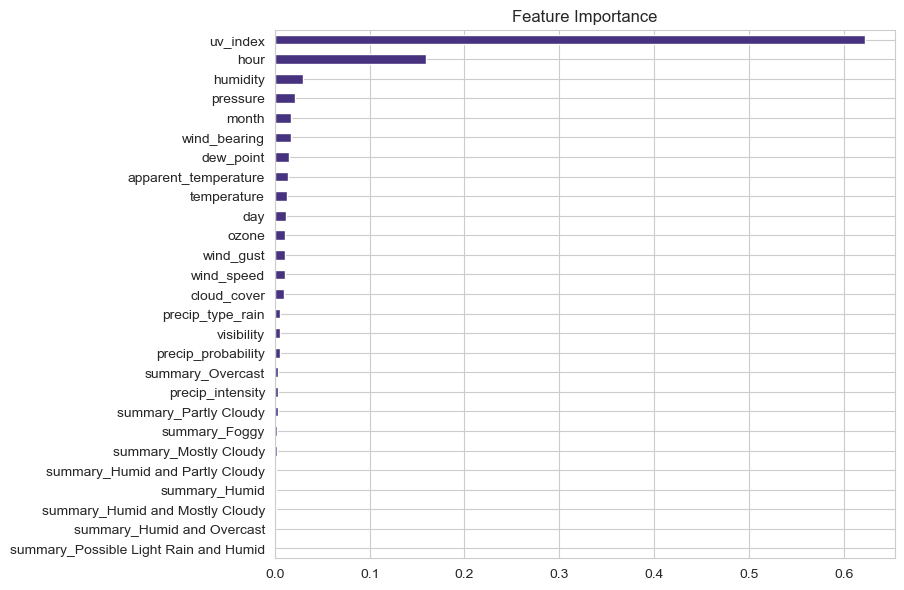

In [172]:
plt.figure(figsize=(8,7),dpi=100)
pd.Series(feature_selection.feature_importances_,index=X.iloc[:5413,:].drop('datetime_local',axis=1).columns).nlargest(30).sort_values().plot(kind='barh')
plt.title('Feature Importance')

## XGBOOST

In [173]:
from xgboost import XGBRegressor

In [174]:
# defining parameters for hyper parameter tuning

param = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
         "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
         "min_child_weight" : [ 1, 3, 5, 7 ],
         "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
         "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [175]:
# RandomizedSearchCV for hyper parameter tuning

random_xg = RandomizedSearchCV(xgb.XGBRegressor(n_jobs=-1),param_distributions=param,cv=5,n_jobs=-1,scoring='neg_mean_squared_error',verbose=1,n_iter=150)

In [176]:
random_xg.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   iid='deprecated', n_iter=150, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                      

In [177]:
random_xg.best_params_

{'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.15,
 'gamma': 0.2,
 'colsample_bytree': 0.5}

In [178]:
# creating model using best parameters from RandomizedSearchCV

xg = XGBRegressor(min_child_weight=5,learning_rate=0.05,gamma=0.1,colsample_bytree=0.5,max_depth=5)

In [179]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [180]:
print('\nTraining Score : ',xg.score(X_train,y_train))
print('Test Score     : ',xg.score(X_test,y_test),'\n')


Training Score :  0.9021756023099483
Test Score     :  0.7209764090489295 



In [181]:
cross_val_score(xg,X_train,y_train,cv=5).mean()

0.8146255350436483

## KNN

In [182]:
# GridSearchCV for hyper parameter tuning

grid = GridSearchCV(KNeighborsRegressor(),param_grid={'n_neighbors' : list(range(3,30,2))},cv=5,verbose=1,scoring='neg_mean_squared_error',n_jobs=-1)

In [183]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    5.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [184]:
grid.best_params_

{'n_neighbors': 11}

In [185]:
# creating model using parameters from GridSearchCV

knn = KNeighborsRegressor(n_neighbors=11).fit(X_train,y_train)

In [186]:
print('\nTraining Score : ',knn.score(X_train,y_train))
print('Test Score     : ',knn.score(X_test,y_test),'\n')


Training Score :  0.7818997826961878
Test Score     :  0.4874903356750315 



In [187]:
cross_val_score(KNeighborsRegressor(n_neighbors=11),X_train,y_train,cv=5).mean()

0.575432747193546

## SVR

In [188]:
# GridSearchCV for hyper parameter tuning

grid_sv = GridSearchCV(SVR(),param_grid={'C' : [1,3,5,10,15,20,25,30,40,50],'gamma' : [1e-4,1e-3,1e-2,1e-1,1,'scale']},cv=5,scoring='neg_mean_squared_error',verbose=1,n_jobs=-1)

In [189]:
grid_sv.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 3, 5, 10, 15, 20, 25, 30, 40, 50],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 'scale']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [190]:
grid_sv.best_params_

{'C': 20, 'gamma': 0.01}

In [191]:
# creating model using parameters from GridSearchCV

sv = SVR(C=20,kernel='rbf',gamma=0.01)

In [192]:
sv.fit(X_train,y_train)

SVR(C=20, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [193]:
print('\nTraining Score : ',sv.score(X_train,y_train))
print('Test Score     : ',sv.score(X_test,y_test),'\n')


Training Score :  0.8439944317473684
Test Score     :  0.7019170548979266 



In [194]:
cross_val_score(sv,X_train,y_train,cv=5).mean()

0.7859459303726758

# Model Selection

In [195]:
model = {
    'model' : ['XGBOOST','KNN','SVR'],
    'train_score' : [xg.score(X_train,y_train),knn.score(X_train,y_train),sv.score(X_train,y_train)],
    'test_score' : [xg.score(X_test,y_test),knn.score(X_test,y_test),sv.score(X_test,y_test)],
    'cross_val_score' : [cross_val_score(xg,X_train,y_train,cv=5).mean(),cross_val_score(knn,X_train,y_train,cv=5).mean(),cross_val_score(sv,X_train,y_train,cv=5).mean()]
}

In [196]:
model_selection = pd.DataFrame(model).set_index('model')

In [197]:
model_selection

,train_score,test_score,cross_val_score
model,,,
XGBOOST,0.902176,0.720976,0.814626
KNN,0.781900,0.487490,0.575433
SVR,0.843994,0.701917,0.785946


In [198]:
model_selection['avg'] = model_selection.sum(axis=1)/3

Text(0.5, 1.0, 'R2 SCORE')

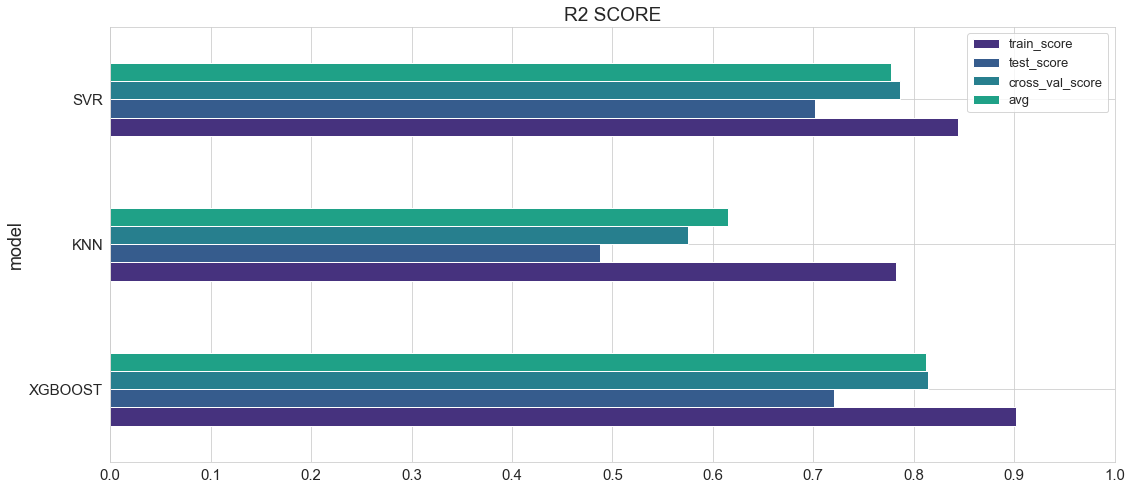

In [199]:
model_selection.plot(kind='barh',figsize=(18,8),fontsize=15)
plt.ylabel('model',fontsize=18)
plt.legend(fontsize=13)
plt.grid(True)
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.title('R2 SCORE',fontsize=19)

In [200]:
## Hence we're going to use XGBOOST for predictions on Oct 2019 data

# Predictions

In [201]:
# checking mean power generated for the month of oct in year 2017 and 2018

train_final[train_final['month']==10]['Cum Power'].mean()

28.226549295774678

In [202]:
test.drop(['datetime_local','year'],axis=1).columns == X.iloc[5413:,:].drop('datetime_local',axis=1).columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [203]:
# creating new data frame for predictions

test_final = test.drop(['datetime_local','year'],axis=1)

In [204]:
# filtering records from 6pm to 6am

test_final = test_final[(test_final['hour'] > 5 ) & (test_final['hour'] < 19 )]

In [205]:
test_final

,month,day,hour,cloud_cover,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,visibility,precip_intensity,precip_probability,apparent_temperature,temperature,humidity,dew_point,precip_type_rain,summary_Foggy,summary_Humid,summary_Humid and Mostly Cloudy,summary_Humid and Overcast,summary_Humid and Partly Cloudy,summary_Mostly Cloudy,summary_Overcast,summary_Partly Cloudy,summary_Possible Light Rain and Humid
6,10,1,6,0.48,95.0,2.31,4.07,1008.61,0.0,271.8,16.09,0.0,0.0,25.08,24,1,21.97,0,0,0,0,0,0,0,0,1,0
7,10,1,7,0.51,96.0,2.98,4.65,1008.97,0.0,272.4,16.09,0.0,0.0,25.69,25,1,22.34,0,0,0,1,0,0,0,0,0,0
8,10,1,8,0.59,99.0,3.44,5.14,1009.53,1.0,272.8,16.09,0.0,0.0,26.22,25,1,22.35,0,0,0,1,0,0,0,0,0,0
9,10,1,9,0.66,102.0,3.49,4.77,1010.00,3.0,272.6,16.09,0.0,0.0,29.03,27,1,22.21,0,0,0,0,0,0,1,0,0,0
10,10,1,10,0.69,101.0,2.92,3.52,1009.99,4.0,271.6,16.09,0.0,0.0,31.31,28,1,22.12,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638,10,27,14,0.00,323.0,3.57,3.76,1011.51,5.0,266.9,16.09,0.0,0.0,32.40,32,0,7.83,0,0,0,0,0,0,0,0,0,0
639,10,27,15,0.00,337.0,3.44,3.70,1010.58,3.0,266.5,16.09,0.0,0.0,32.06,32,0,7.23,0,0,0,0,0,0,0,0,0,0
640,10,27,16,0.00,343.0,3.01,3.43,1010.33,1.0,266.1,16.09,0.0,0.0,32.01,32,0,7.26,0,0,0,0,0,0,0,0,0,0
641,10,27,17,0.00,348.0,2.50,3.14,1010.47,0.0,265.4,16.09,0.0,0.0,31.08,31,0,7.67,0,0,0,0,0,0,0,0,0,0


In [206]:
# normalising test_final before predictions

test_final = scaler.transform(test_final)

In [207]:
predictions = xg.predict(test_final)

In [208]:
predictions.mean()

26.01244

In [209]:
# again creating new data frame

test_final = test[(test['hour'] > 5 ) & (test['hour'] < 19 )]

In [210]:
# adding new column Cum Power (predictions)

test_final['Cum Power'] = predictions

In [211]:
test_final = test_final[['datetime_local', 'year', 'month', 'day', 'hour', 'cloud_cover',
       'wind_bearing', 'wind_speed', 'wind_gust', 'pressure', 'uv_index',
       'ozone', 'visibility', 'precip_intensity', 'precip_probability',
       'apparent_temperature', 'temperature', 'humidity', 'dew_point',
       'Cum Power', 'precip_type_rain', 'summary_Foggy', 'summary_Humid',
       'summary_Humid and Mostly Cloudy', 'summary_Humid and Overcast',
       'summary_Humid and Partly Cloudy', 'summary_Mostly Cloudy',
       'summary_Overcast', 'summary_Partly Cloudy',
       'summary_Possible Light Rain and Humid']]

In [212]:
train_final.columns == test_final.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [213]:
# concatenating test_final and train_final to compare results

check = pd.concat([train_final,test_final])

Text(0.5, 1.0, 'October')

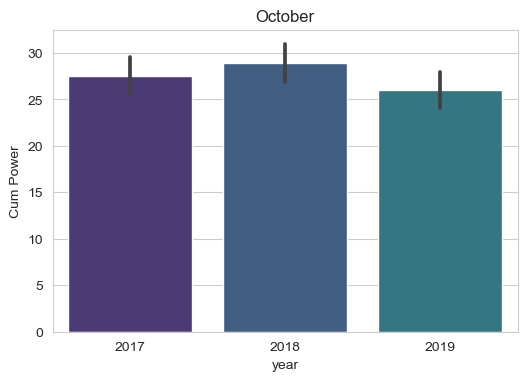

In [214]:
## it is observed that power generated in Oct 2019 is less as compared to Oct 2018 and Oct 2017

plt.figure(dpi=100)
sns.barplot(x='year',y='Cum Power',data=check[check['month']==10])
plt.title('October')

Text(0.5, 1.0, 'Solar Power Generation 2019')

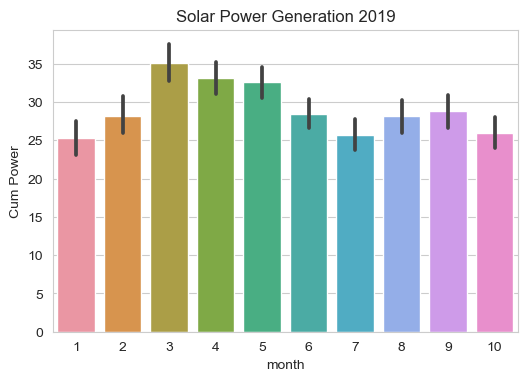

In [215]:
plt.figure(dpi=100)
sns.barplot(x='month',y='Cum Power',data=check[check['year']==2019])
plt.title('Solar Power Generation 2019')

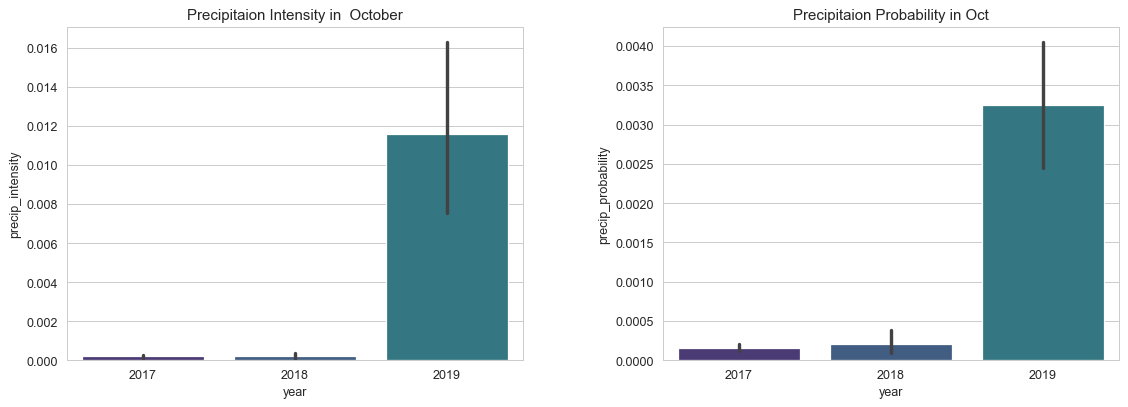

In [216]:
## it is observed that power generated in month of Oct 2019 is less than power generated in Sep 2019 or Aug 2019, Let's find out why?

# high precipiation intensity leads to decrease in power generation


fig, axes = plt.subplots(ncols=2,nrows=1,dpi=90,figsize=(14,6))

sns.barplot(x='year',y='precip_intensity',data=check[check['month']==10],ax=axes[0])
axes[0].set_title('Precipitaion Intensity in  October')

sns.barplot(x='year',y='precip_probability',data=check[check['month']==10],ax=axes[1])
axes[1].set_title('Precipitaion Probability in Oct')

plt.tight_layout(pad=6.0)

Text(0.5, 1.0, 'UV_Index in Oct')

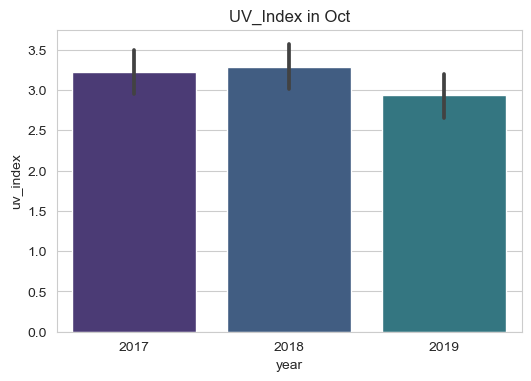

In [217]:
# increased precipitaion probability leads to decrease in UV INDEX

plt.figure(dpi=100)
sns.barplot(x='year',y='uv_index',data=check[check['month']==10])
plt.title('UV_Index in Oct')

Text(0.5, 1.0, 'Cloud Cover in Oct')

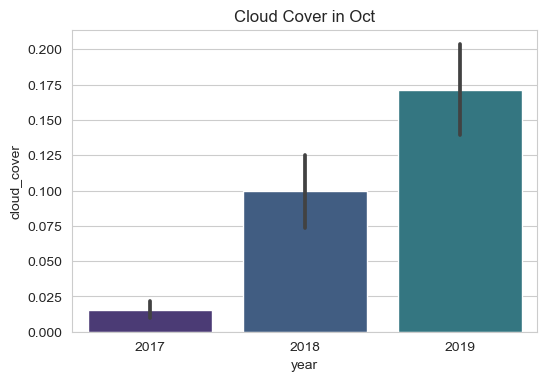

In [218]:
# increased cloud cover

plt.figure(dpi=100)
sns.barplot(x='year',y='cloud_cover',data=check[check['month']==10])
plt.title('Cloud Cover in Oct')

### AVG Power Generated In Oct 2019 decreased due to :
- increased precipiation probability and intensity
- increased cloud cover
- decrease in uv index

## Exporting Predictions

In [219]:
# creating new data frame sub (submission)

sub = pd.read_csv('test.csv')

In [220]:
# removing records from 6pm to 6am

sub = sub[(sub['hour'] > 5 ) & (sub['hour'] < 19 )]

In [221]:
sub['power'] = predictions

In [222]:
sub.sample(5)

,datetime_local,year,month,day,hour,cloud_cover,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,visibility,precip_intensity,precip_probability,apparent_temperature,temperature,humidity,dew_point,precip_type,summary,power
462,2019-10-20 06:00:00,2019,10,20,6,0.14,5,1.00,2.07,1015.06,0,278.0,16.09,0.00,0.00,21.22,21,1,15.10,none,Partly Cloudy,0.647142
473,2019-10-20 17:00:00,2019,10,20,17,0.00,334,3.53,3.73,1012.18,0,276.7,16.09,0.00,0.00,32.00,32,0,9.77,none,Clear,8.755656
205,2019-10-09 13:00:00,2019,10,9,13,0.00,48,1.54,1.71,1011.32,8,277.1,16.09,0.00,0.00,32.70,33,0,15.69,none,Clear,53.206825
35,2019-10-02 11:00:00,2019,10,2,11,0.21,6,1.59,1.69,1011.88,7,275.2,16.09,0.02,0.01,31.98,29,1,21.19,rain,Partly Cloudy,42.594212
497,2019-10-21 17:00:00,2019,10,21,17,0.00,326,3.61,6.08,1010.73,0,275.7,16.09,0.00,0.00,31.42,31,0,6.85,none,Clear,9.115511


In [223]:
# exporting predictions

sub.to_csv('submission.csv',index=False)

In [224]:
### end ###